In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import scipy
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

In [117]:
HRdf=pd.read_excel('HR_Employee_Attrition.xlsx')

In [118]:
HRdf

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [7]:
# checking for number of records 
HRdf.shape[0]

1470

In [8]:
#checking for number of columns
HRdf.shape[1]

35

In [9]:
#checking datatypes of each feature
HRdf.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [12]:
HRdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [13]:
HRdf.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
# great luckily we dont have any missing values so no need to perform imputation for filing missing values

In [14]:
HRdf.duplicated().sum()

0

In [15]:
HRdf.describe(include='all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


In [119]:
# Seperating Categorical and numerical columnns
category=[]
numerical=[]
def sep_feature(): 
    
    for i in HRdf.columns:
        if HRdf[i].dtypes=='object':
            category.append(i)
        else:
            numerical.append(i)

In [120]:
sep_feature()

In [121]:
#categorical columns
category

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [122]:
#numeric  columns
numerical

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [123]:
for i in category:
    print('  fetaure {} : uniques values are '.format(i),HRdf[i].unique())
    print('*' *50)

  fetaure Attrition : uniques values are  ['Yes' 'No']
**************************************************
  fetaure BusinessTravel : uniques values are  ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
**************************************************
  fetaure Department : uniques values are  ['Sales' 'Research & Development' 'Human Resources']
**************************************************
  fetaure EducationField : uniques values are  ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
**************************************************
  fetaure Gender : uniques values are  ['Female' 'Male']
**************************************************
  fetaure JobRole : uniques values are  ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
**************************************************
  fetaure MaritalStatus 

In [125]:
for i in numerical:
    print('  fetaure {} : uniques values are '.format(i),HRdf[i].unique())
    print('*'*50)

  fetaure Age : uniques values are  [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
**************************************************
  fetaure DailyRate : uniques values are  [1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355 1150 1329  959 1033 1316  364  438  689
  201 1427  857  933 1181 139

In [21]:
#checking for the freaquency of each value of the feature in the dataset
for i in HRdf.columns:
    print(HRdf[i].value_counts())

Age
35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: count, dtype: int64
Attrition
No     1233
Yes     237
Name: count, dtype: int64
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
DailyRate
691     6
408     5
530     5
1329    5
1082    5
       ..
650     1
279     1
316     1
314     1
628     1
Name: count, Length: 886, dtype: int64
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
DistanceFromHome
2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
1

In [22]:
HRdf['Over18'].value_counts()

Over18
Y    1470
Name: count, dtype: int64

In [126]:
HRdf.drop('Over18',axis=1,inplace=True)

In [128]:
# checking and droping columns from the datset that have only one data level
dummy = []
for col in HRdf.columns:
    if len(HRdf[col].unique()) == 1:
        dummy.append(col)
        HRdf.drop(col,inplace=True,axis=1)

In [25]:
# Employee feature and standardHours feature i have droped from the dataframe as it has only one level of data 
dummy

['EmployeeCount', 'StandardHours']

In [129]:
HRdf.shape

(1470, 32)

In [25]:
HRdf

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,2061,3,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,2062,4,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,2065,4,...,3,4,0,17,3,2,9,6,0,8


<Axes: xlabel='Attrition'>

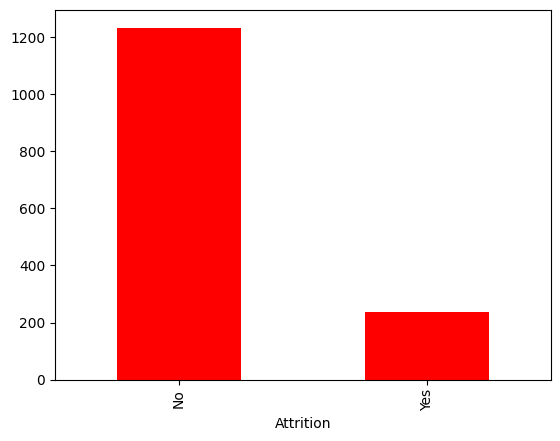

In [130]:
HRdf['Attrition'].value_counts().plot(kind='bar',color='red')

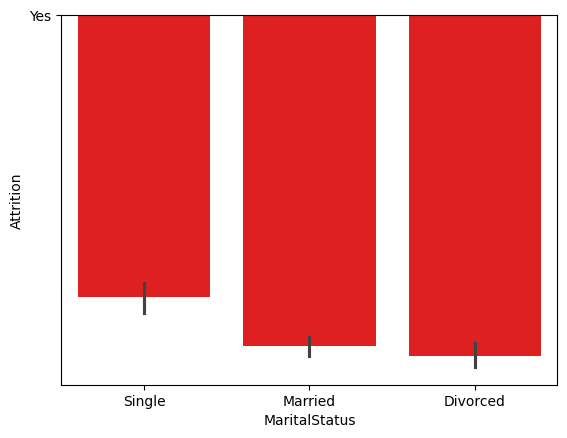

In [27]:
sns.barplot(x='MaritalStatus', y='Attrition', data=HRdf,color='red')
plt.show()

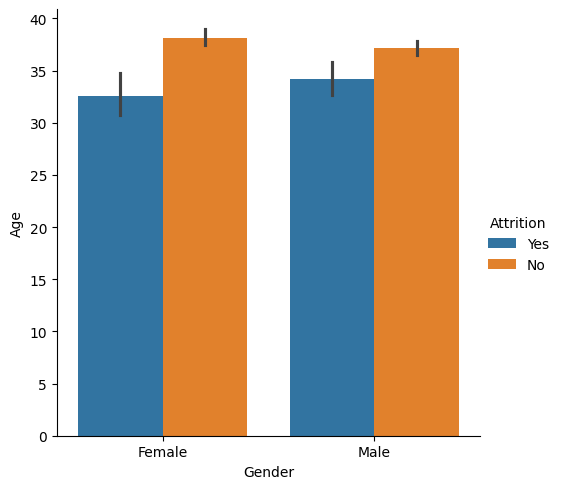

In [28]:
sns.catplot(x="Gender", y="Age", hue="Attrition", kind='bar',data=HRdf)


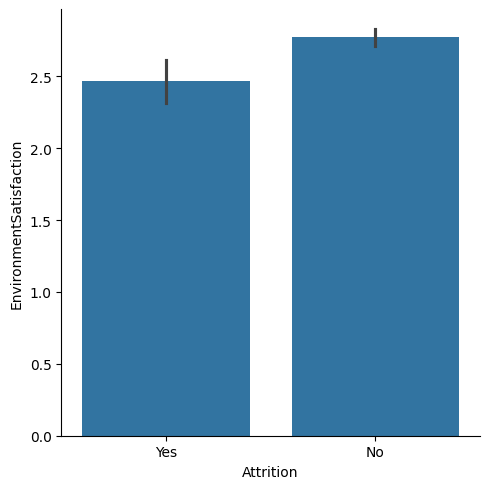

In [26]:
sns.catplot(x='Attrition' , y= 'EnvironmentSatisfaction',  kind = 'bar', data=HRdf, aspect =1)

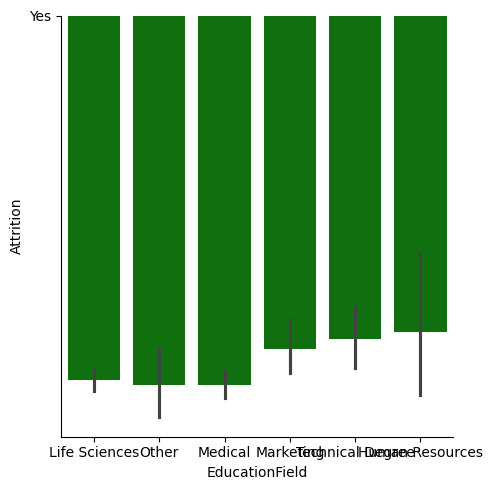

In [28]:
sns.catplot(x = 'EducationField', y='Attrition', kind = 'bar', data=HRdf, aspect = 1,color='green',edgecolor='black')

In [ ]:
# Here from the observation We conclude most of the employee quit the job are from  techninal field and from HR field

<Axes: xlabel='Education'>

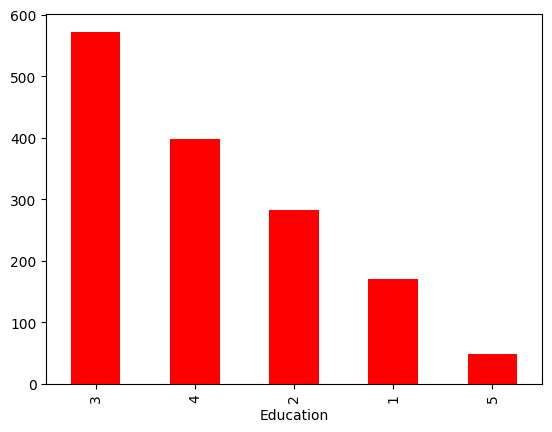

In [28]:
HRdf['Education'].value_counts().plot(kind='bar',color='red')

<Axes: xlabel='Education'>

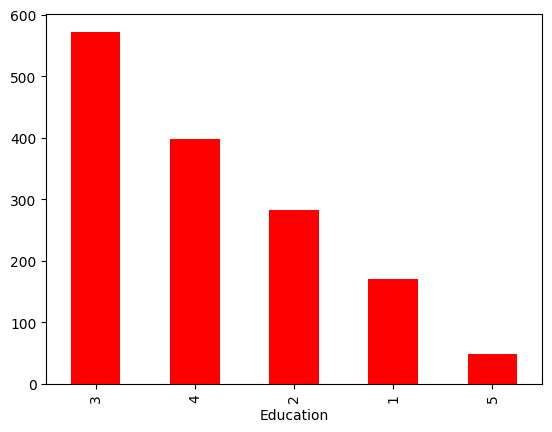

In [34]:
HRdf['Education'].value_counts().plot(kind='bar',color='red')

<Figure size 2000x1000 with 0 Axes>

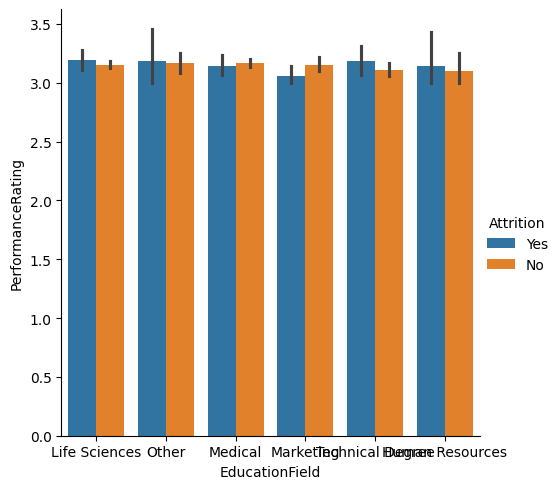

In [36]:
plt.figure(figsize=(20,10))
sns.catplot(x="EducationField", y="PerformanceRating", hue="Attrition",kind='bar',data=HRdf)

<Axes: xlabel='YearsAtCompany', ylabel='Attrition'>

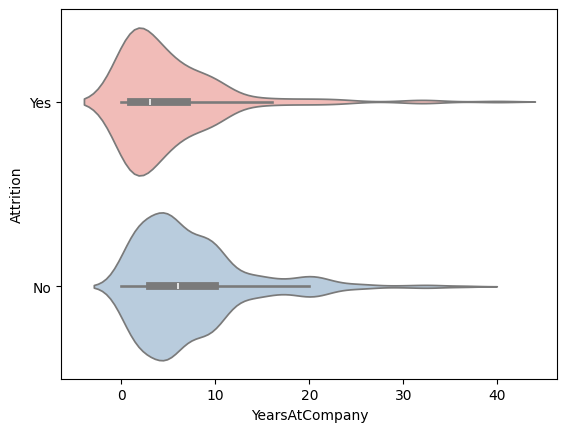

In [116]:
sns.violinplot(x='YearsAtCompany', y="Attrition", data=HRdf,palette='Pastel1')

<Axes: xlabel='YearsWithCurrManager', ylabel='Attrition'>

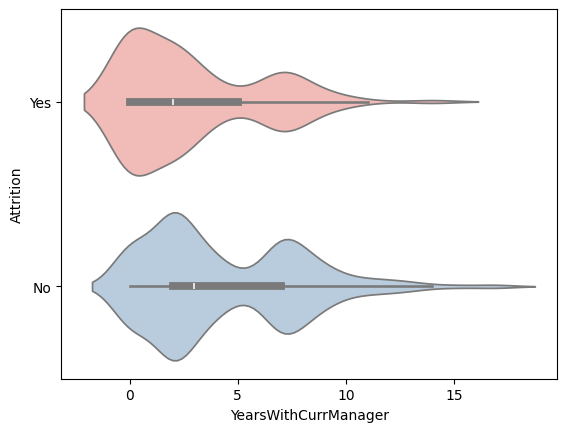

In [117]:
sns.violinplot(x='YearsWithCurrManager', y="Attrition", data=HRdf,palette='Pastel1')

<Axes: xlabel='WorkLifeBalance', ylabel='Attrition'>

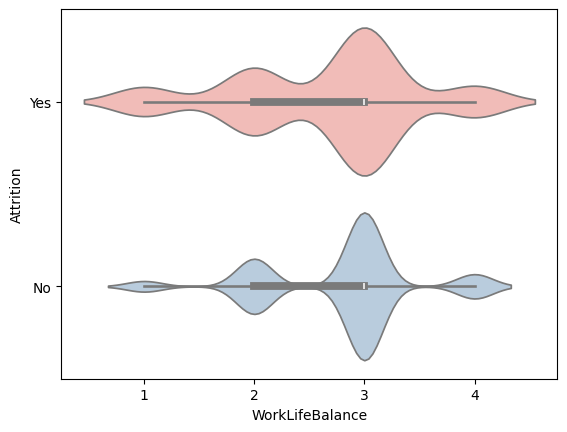

In [30]:
sns.violinplot(x='WorkLifeBalance', y="Attrition", data=HRdf,palette='Pastel1')

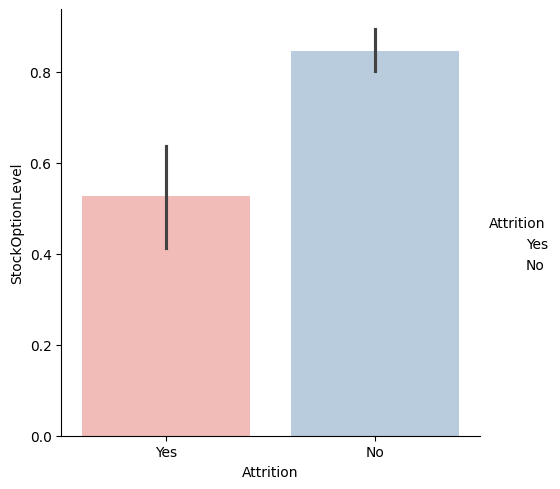

In [34]:
sns.catplot(y='StockOptionLevel', x="Attrition", kind='bar', data=HRdf,palette='Pastel1')

In [35]:
HRdf

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,2061,3,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,2062,4,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,2065,4,...,3,4,0,17,3,2,9,6,0,8


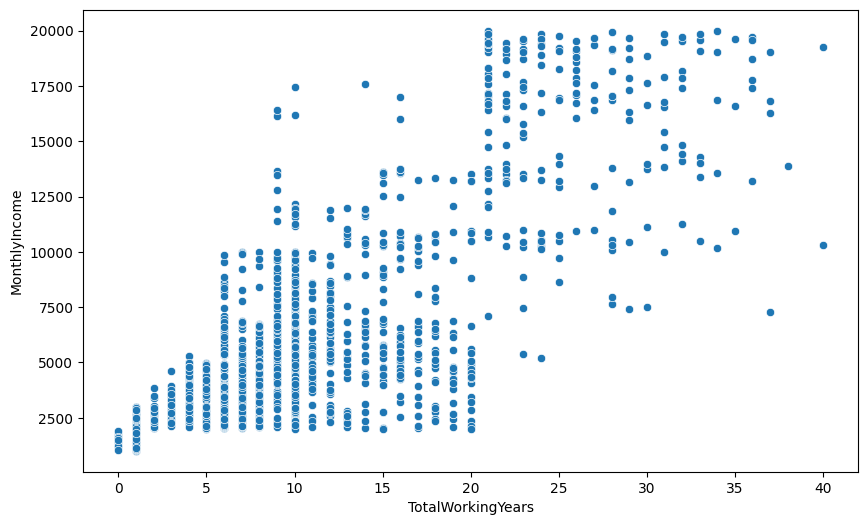

In [29]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='TotalWorkingYears',y='MonthlyIncome',data=HRdf)
plt.show()

In [ ]:
#Here from the above plot we observed that with increase in Total working years monthly income also increases

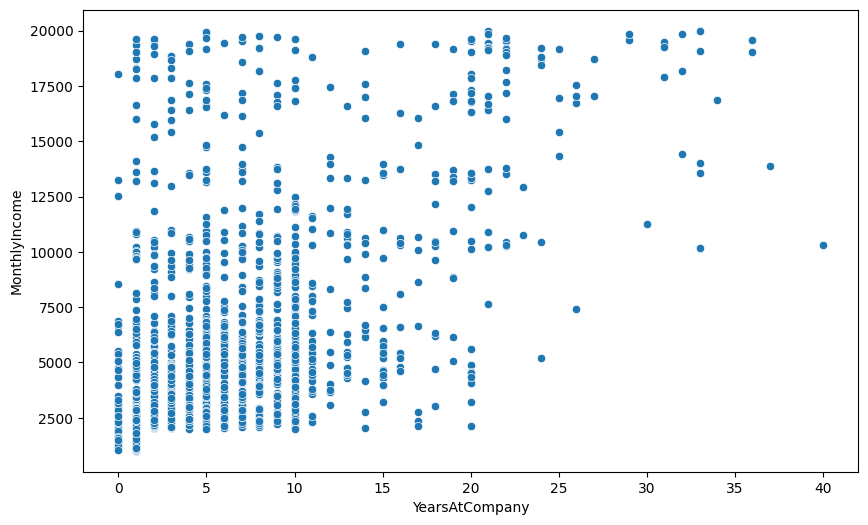

In [30]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='YearsAtCompany',y='MonthlyIncome',data=HRdf)
plt.show()

In [ ]:
# Here from the above scatterplot we observed that after certan years at same company there is less probability that employees salary will increase

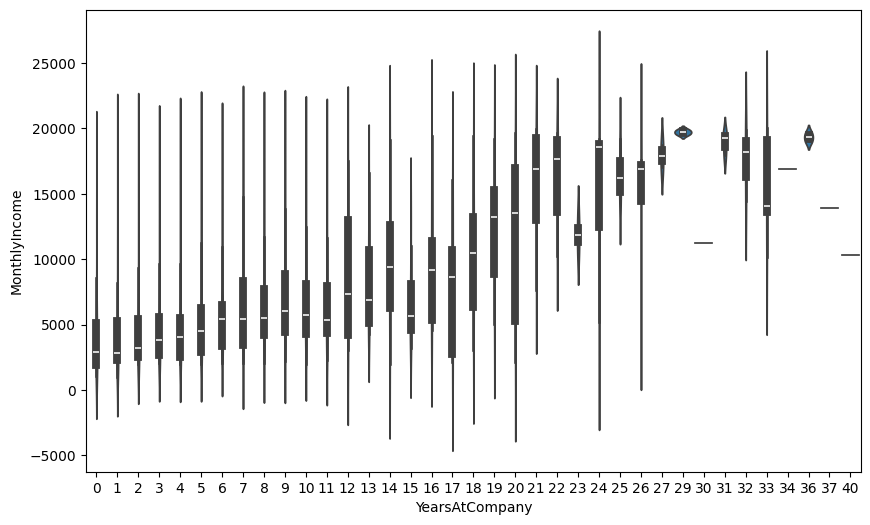

In [58]:
plt.figure(figsize=(10,6))
sns.violinplot(x='YearsAtCompany',y='MonthlyIncome',data=HRdf)
plt.show()

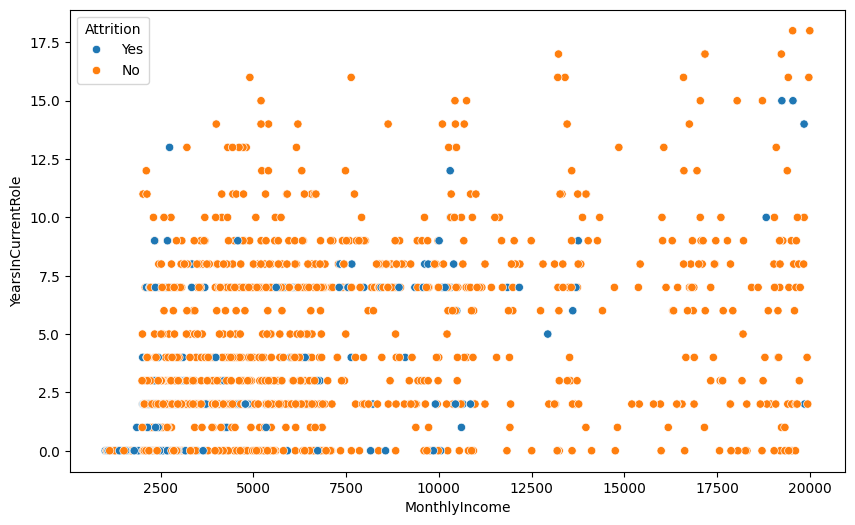

In [63]:
plt.figure(figsize=(10,6))
sns.scatterplot(y='YearsInCurrentRole',x='MonthlyIncome',hue='Attrition',data=HRdf)
plt.show()

([<matplotlib.patches.Wedge at 0x180c0506dd0>,
 [Text(-1.136781068348268, 0.6306574368426737, 'no'),
  Text(0.961891673217765, -0.5336332157899547, 'yes')],
 [Text(-0.6995575805220109, 0.38809688421087607, '83.9%'),
  Text(0.5246681853915082, -0.2910726631581571, '16.1%')])

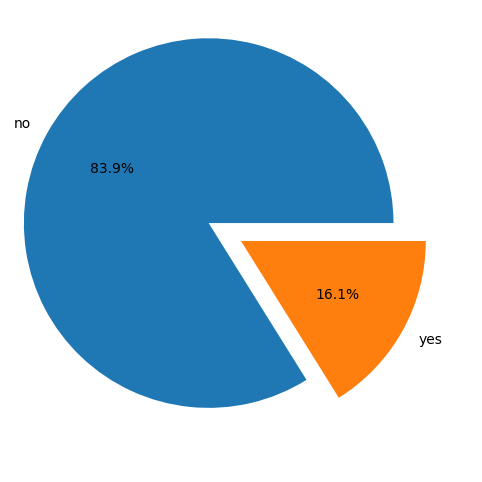

In [31]:
fig=plt.figure(figsize=(10,6))
Attr_count=HRdf['Attrition'].value_counts()
plt.pie(Attr_count,labels=['no','yes'],autopct='%1.1f%%',explode=(0.2,0))

In [131]:
HRdf['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x180c051d390>,
 [Text(-0.6728966948858769, 0.8701781645224518, 'Travel_Rarely'),
  Text(0.36441614894376395, -1.037882878936249, 'Travel_Frequently'),
  Text(1.0439613016770868, -0.3466191001671471, 'Non-Travel')],
 [Text(-0.36703456084684194, 0.4746426351940646, '71.0%'),
  Text(0.19877244487841667, -0.5661179339652267, '18.8%'),
  Text(0.5694334372784109, -0.18906496372753476, '10.2%')])

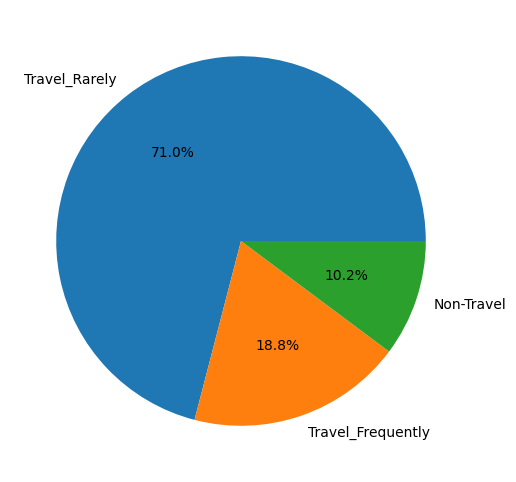

In [34]:
fig=plt.figure(figsize=(10,6))
Travel_count=HRdf['BusinessTravel'].value_counts()
plt.pie(Travel_count,labels=['Travel_Rarely','Travel_Frequently','Non-Travel'],autopct='%1.1f%%')

In [47]:
HRdf['BusinessTravel'].value_counts()

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x180c2b15b10>,
 [Text(-0.355369625451979, 1.0937149671217452, 'Male'),
  Text(0.3399188701202255, -1.0461621106387813, 'Female')],
 [Text(-0.20086109264677068, 0.6181867205470732, '60.0%'),
  Text(0.18541029279285026, -0.5706338785302443, '40.0%')])

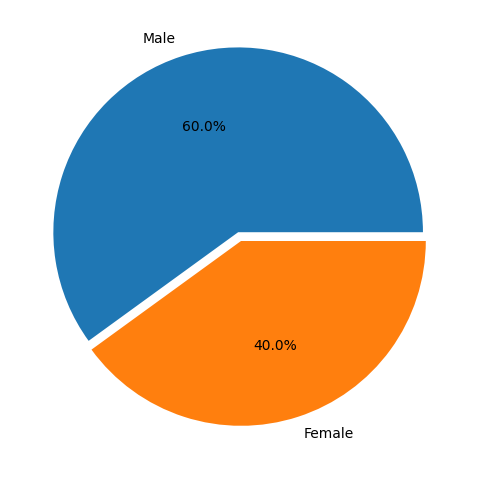

In [35]:
fig=plt.figure(figsize=(10,6))
Attr_count=HRdf['Gender'].value_counts()
plt.pie(Attr_count,labels=['Male','Female'],autopct='%1.1f%%',explode=(0.05,0))

In [30]:
HRdf['Gender'].value_counts()


Gender
Male      882
Female    588
Name: count, dtype: int64

In [54]:
category

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [132]:
del category[7]

In [133]:
numerical

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [134]:
del numerical[4]

In [135]:
del numerical[5]

In [136]:
del numerical[13]

In [137]:
del numerical[14]

In [138]:
#checking the distribution of data in the features
def check_dist():
    plt.figure(figsize=(25,50),facecolor='white')
    count=1
    for i in numerical:
    
        if count<=27:
        
            ax=plt.subplot(12,2,count)
            plt.subplots_adjust(hspace=0.5)
            sns.distplot(HRdf[i],color='red')
            plt.xlabel(i,fontsize=14)
        count=count+1
    plt.show()

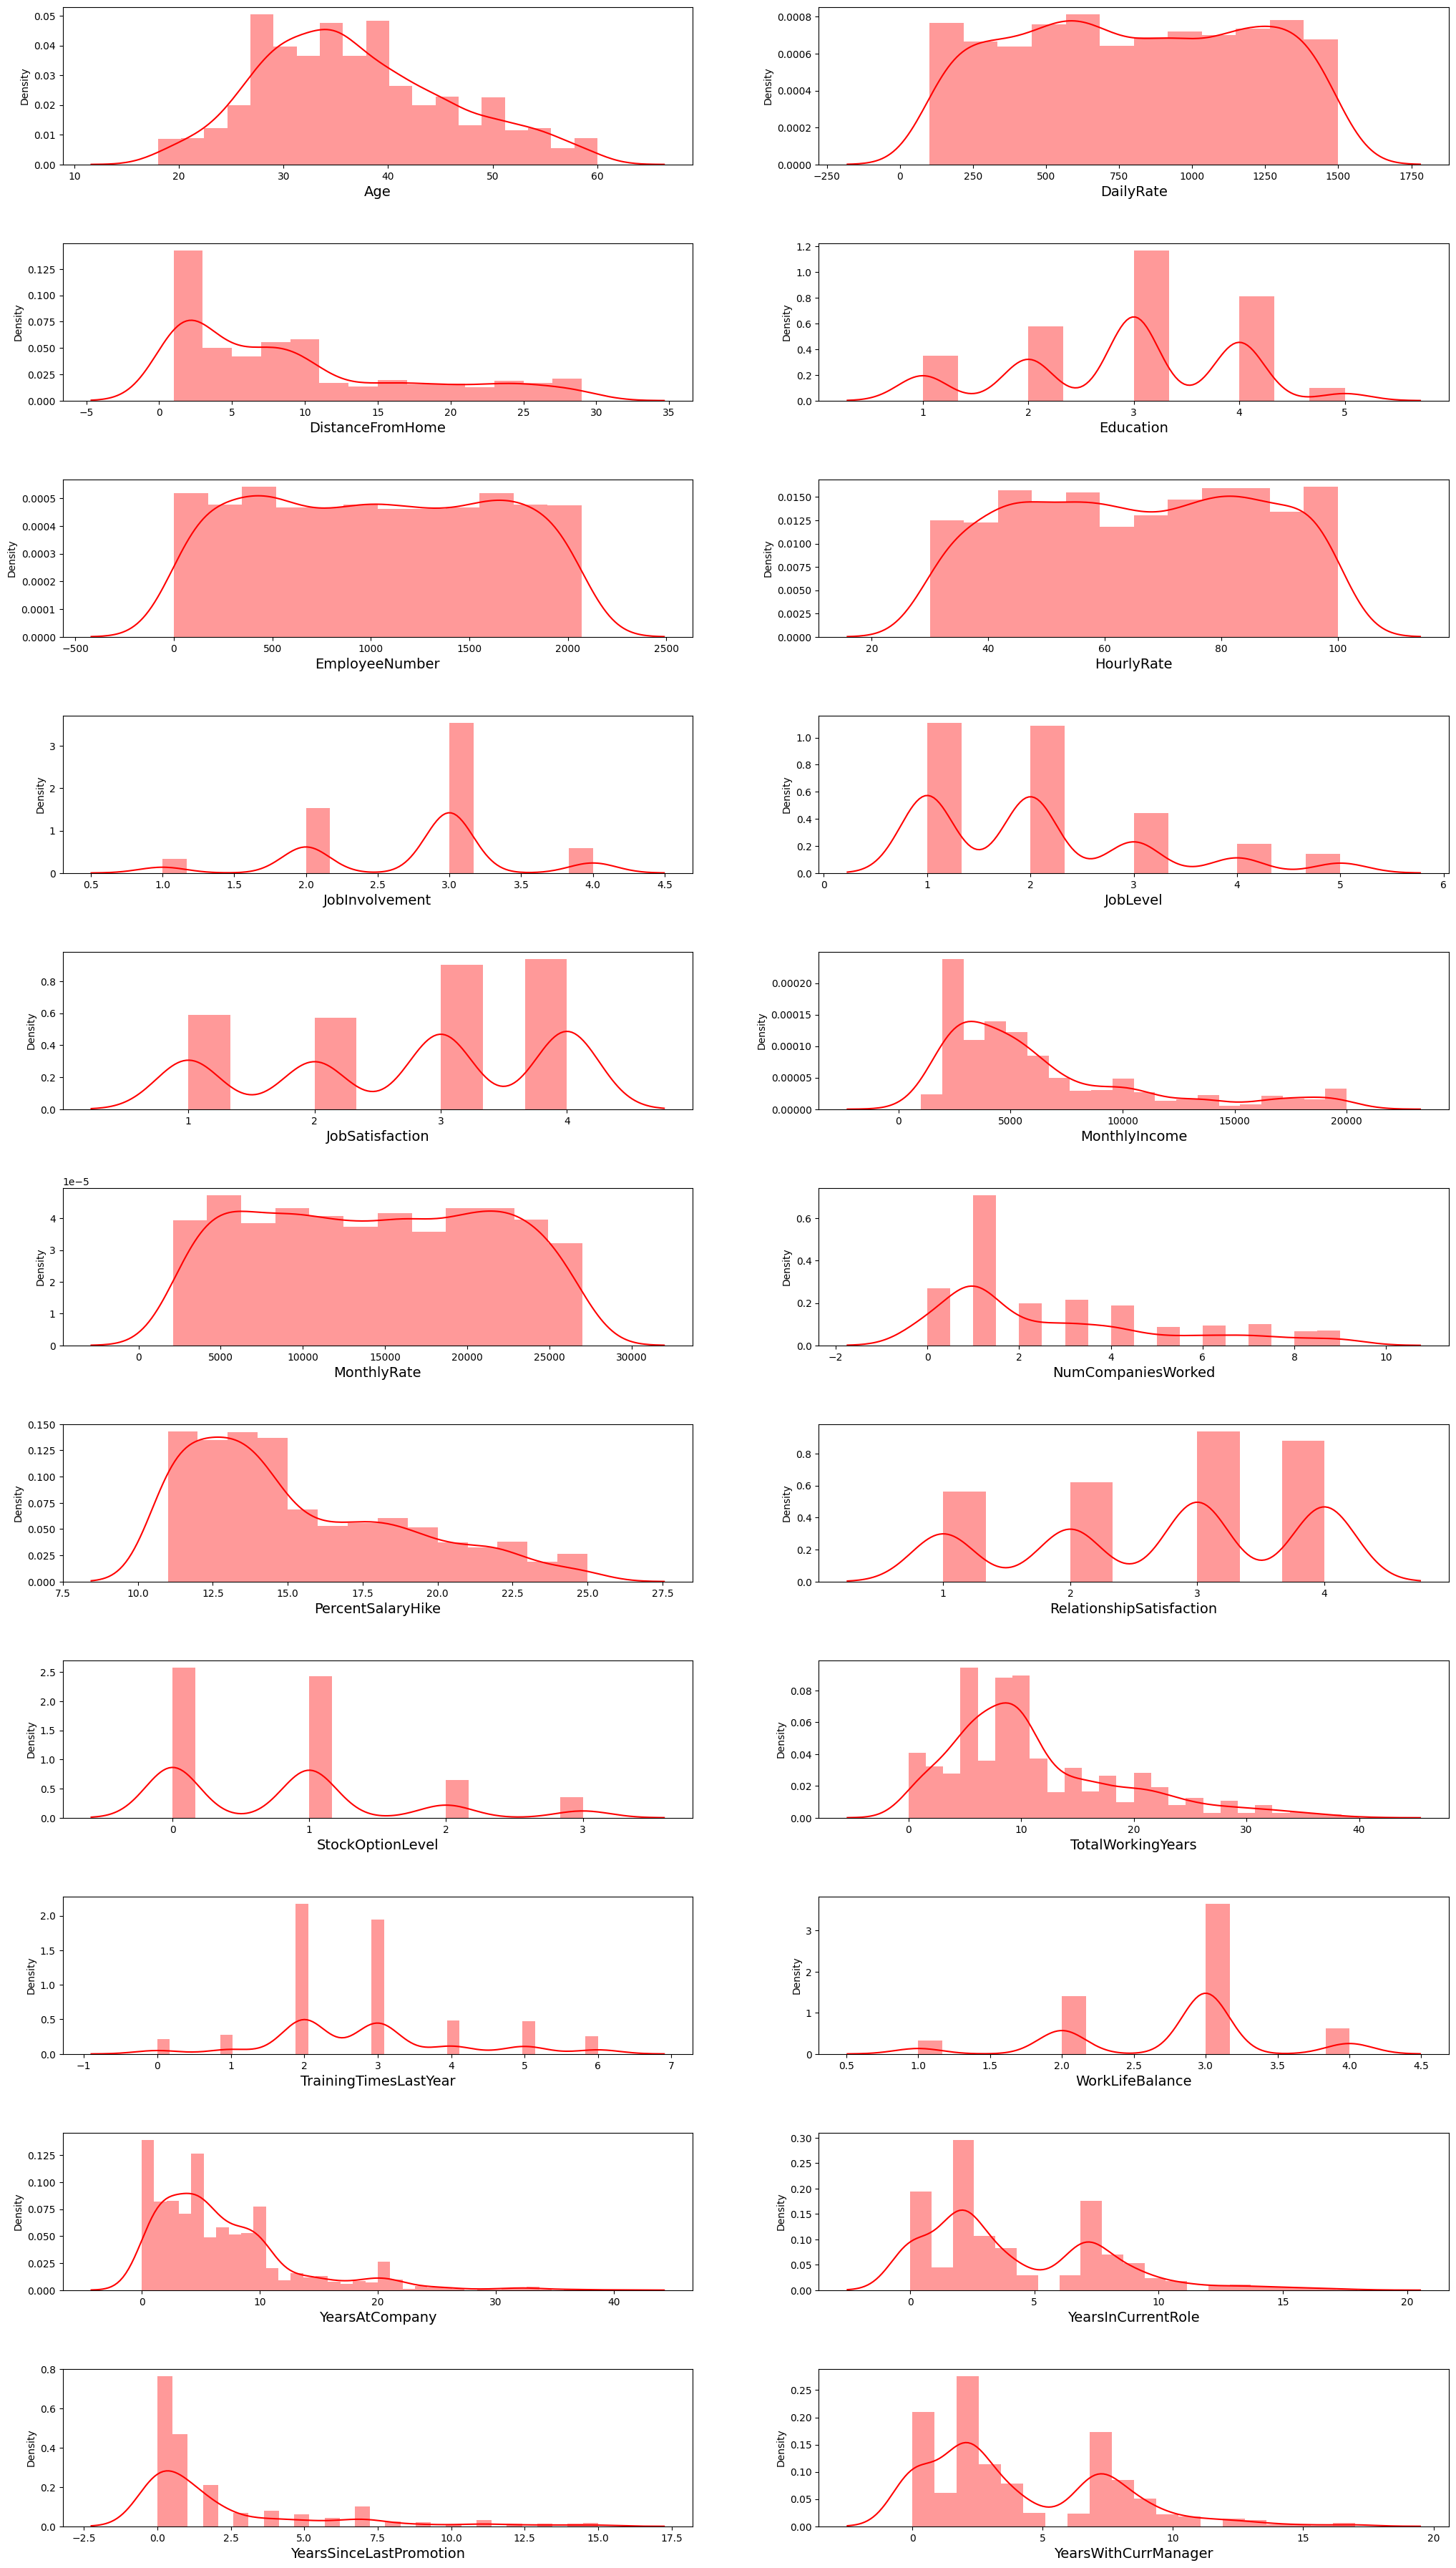

In [139]:
check_dist()

<Axes: xlabel='JobRole', ylabel='PercentSalaryHike'>

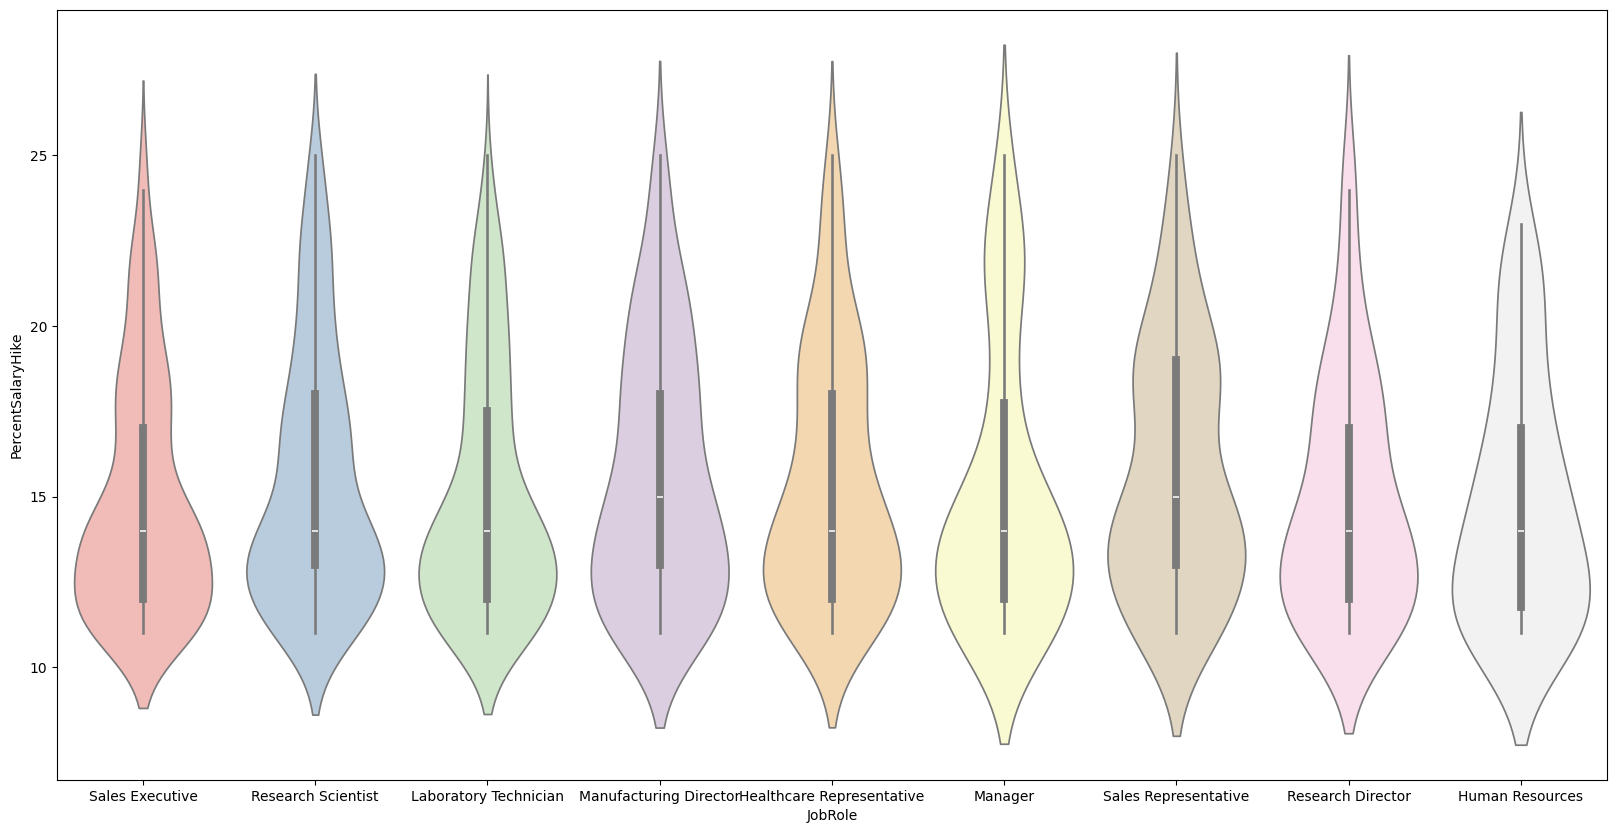

In [41]:
plt.figure(figsize=(20,10))
sns.violinplot(x='JobRole', y='PercentSalaryHike', data=HRdf,palette='Pastel1')

In [140]:
#checking the distribution of data in the features
def check_hist():
    plt.figure(figsize=(25,50),facecolor='white')
    count=1
    for i in numerical:
    
        if count<=27:
        
            ax=plt.subplot(12,2,count)
            plt.subplots_adjust(hspace=0.5)
            sns.histplot(HRdf[i],color='red')
            plt.xlabel(i,fontsize=14)
        count=count+1
    plt.show()

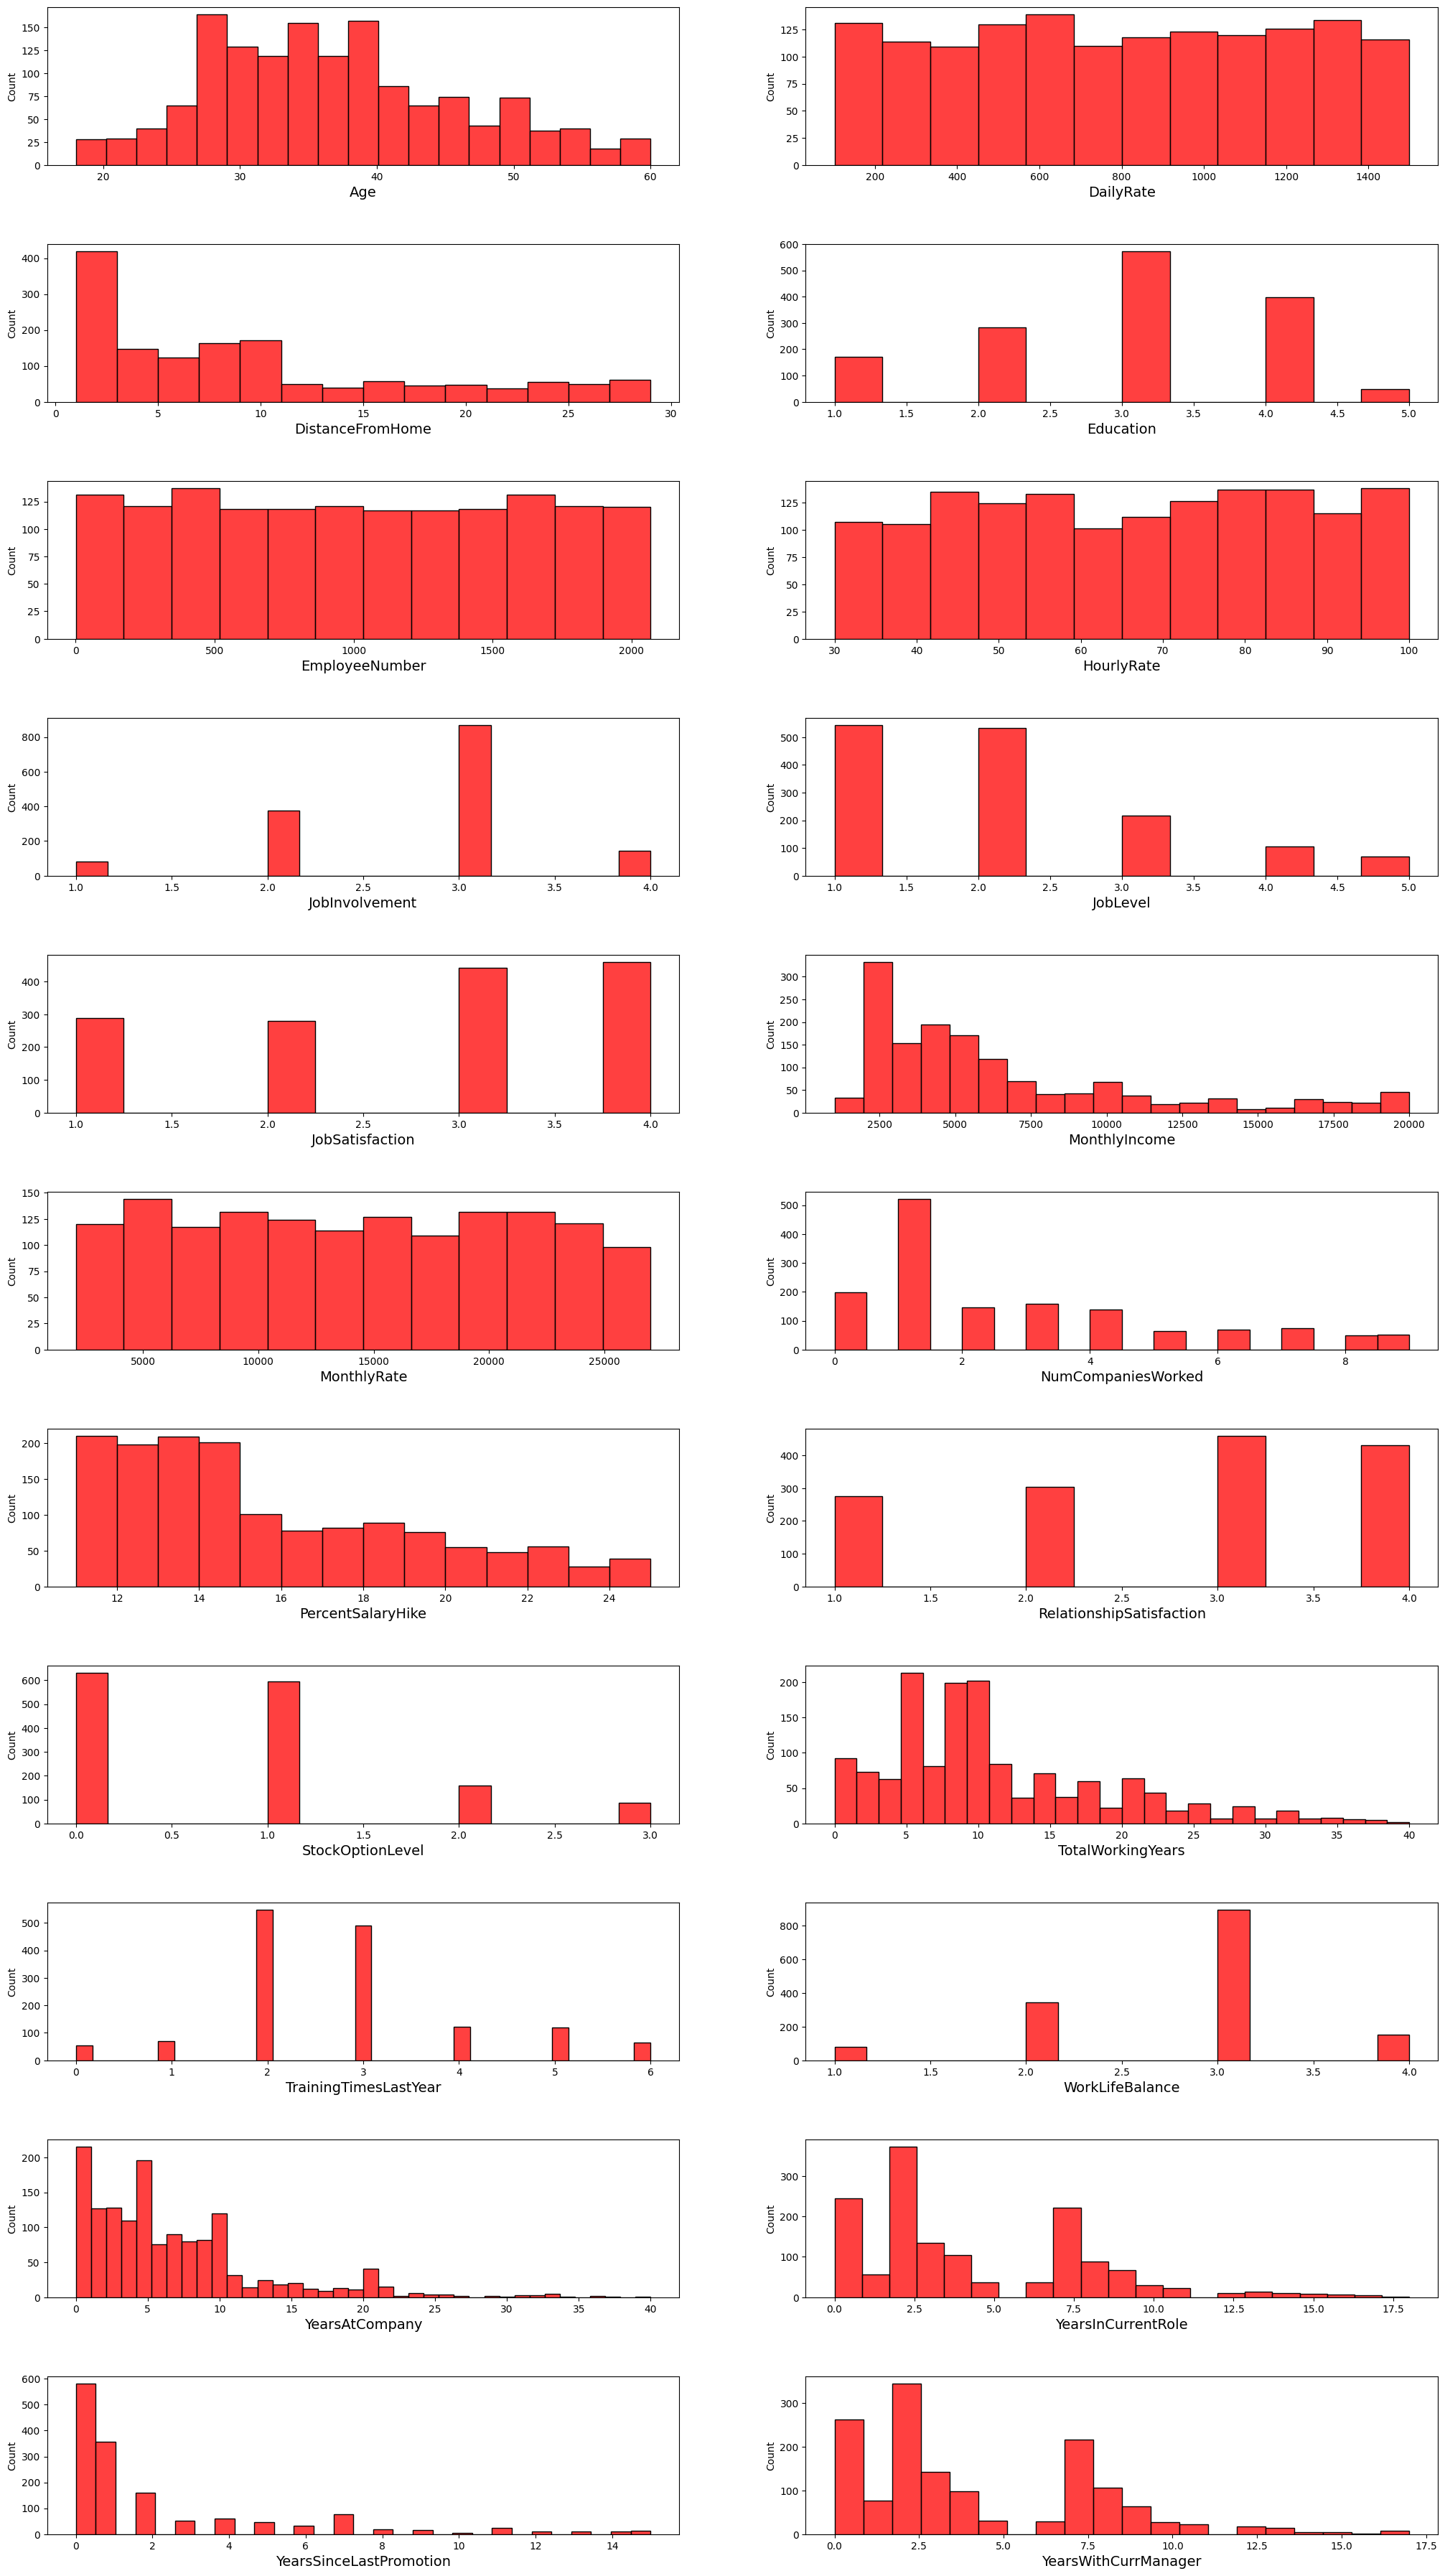

In [141]:
check_hist()


In [54]:
def check_outlier():
    plt.figure(figsize=(25,50),facecolor='white')
    count=1
    for i in numerical:
    
        if count<=27:
        
            ax=plt.subplot(12,2,count)
            plt.subplots_adjust(hspace=0.5)
            sns.boxplot(HRdf[i],color='red')
            plt.xlabel(i,fontsize=14)
        count=count+1
    plt.show()

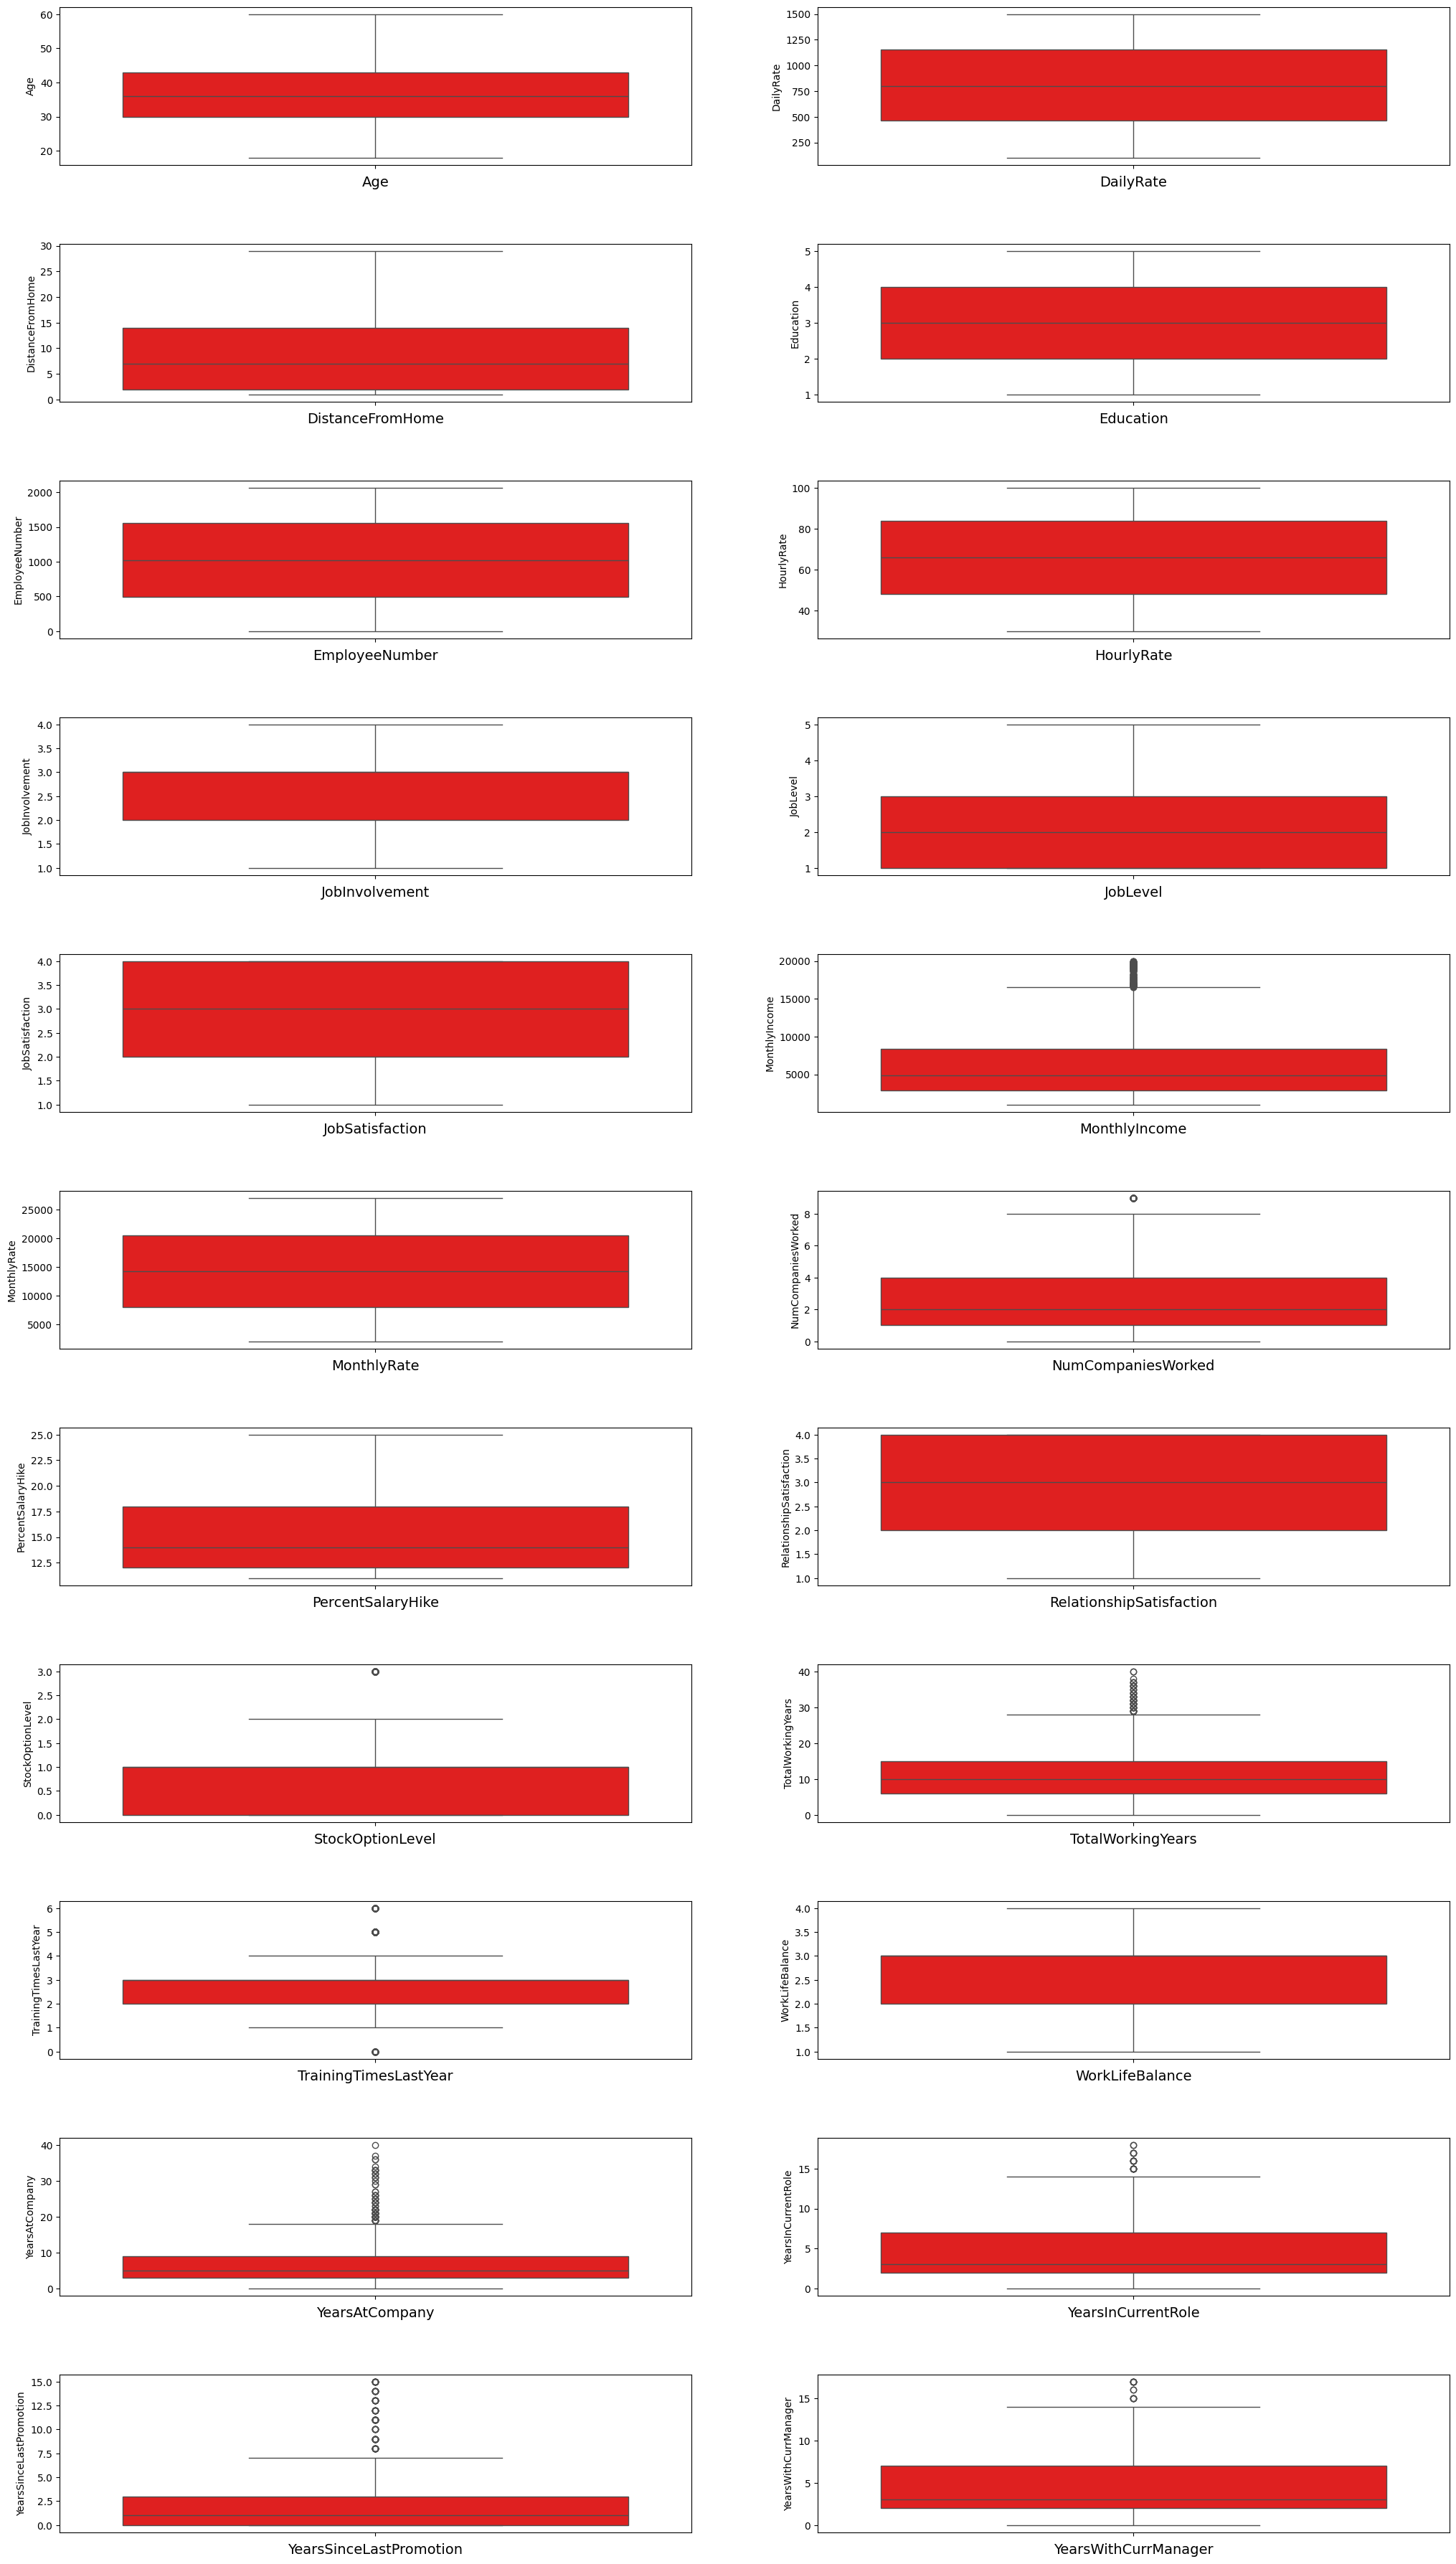

In [55]:
check_outlier()

In [142]:
from feature_engine.outliers import ArbitraryOutlierCapper
def remove_outliers(col):
    
    plt.figure(figsize=(20,10))  
#for i in avdf.columns:
    Q1=HRdf[col].quantile(0.25)
   # Q2=avdf[i].quantile(0.5)
    Q3=HRdf[col].quantile(0.75)
    iqr=Q3-Q1
    lowfence=Q1-1.5*iqr
    uppfence=Q3+1.5*iqr
    print(lowfence)
    print(uppfence)

    arb=ArbitraryOutlierCapper(min_capping_dict={col:lowfence},max_capping_dict={col:uppfence})
    HRdf[[col]]=arb.fit_transform(HRdf[[col]])
    plt.boxplot(HRdf[col])


-5291.0
16581.0
-3.5
8.5
-7.5
28.5
0.5
4.5
-6.0
18.0
-5.5
14.5
-4.5
7.5
-5.5
14.5


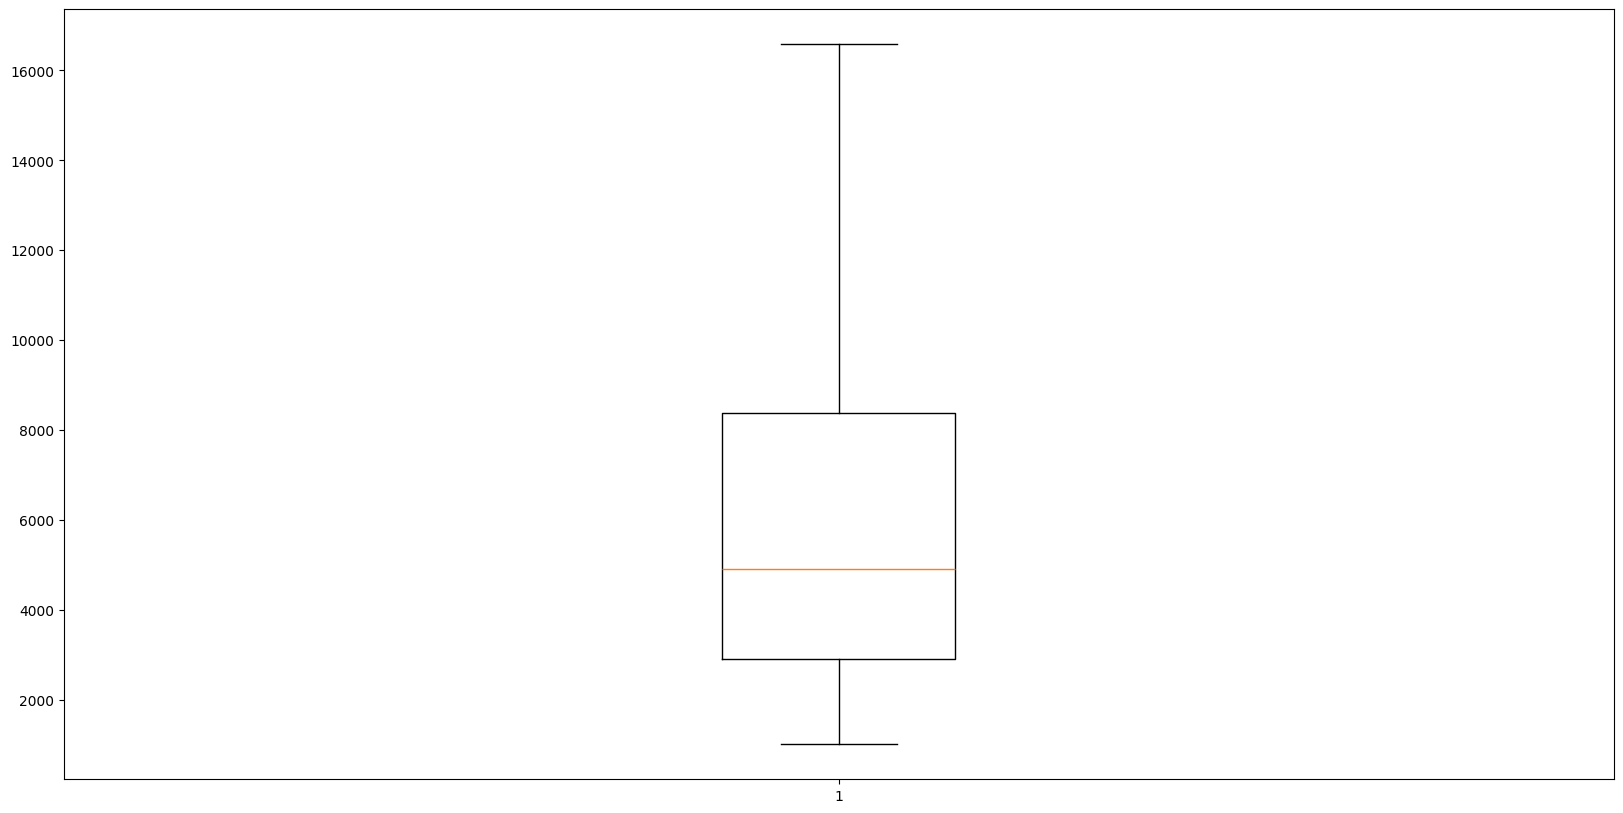

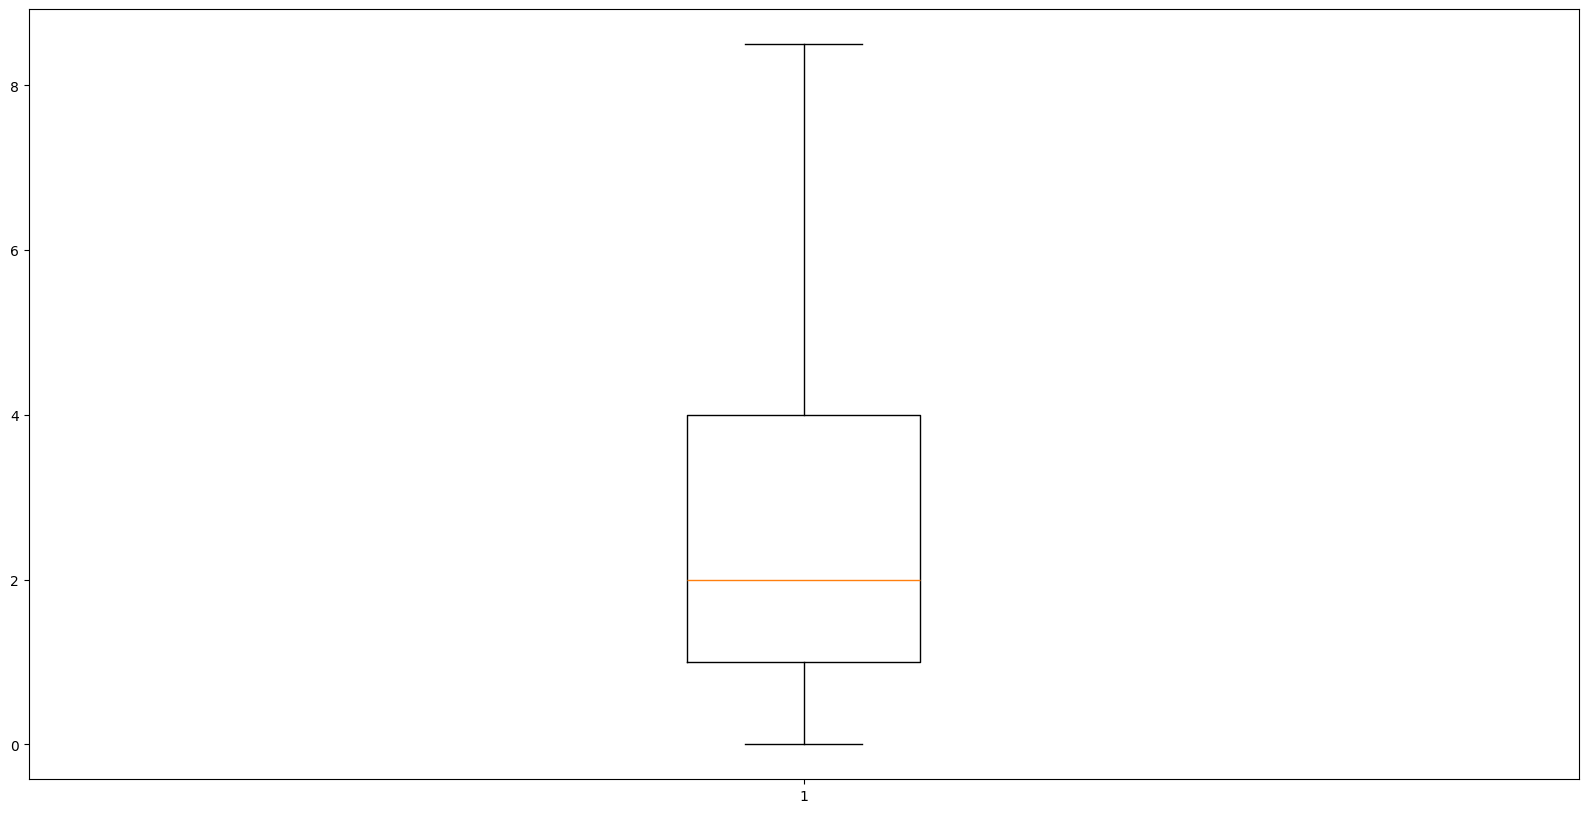

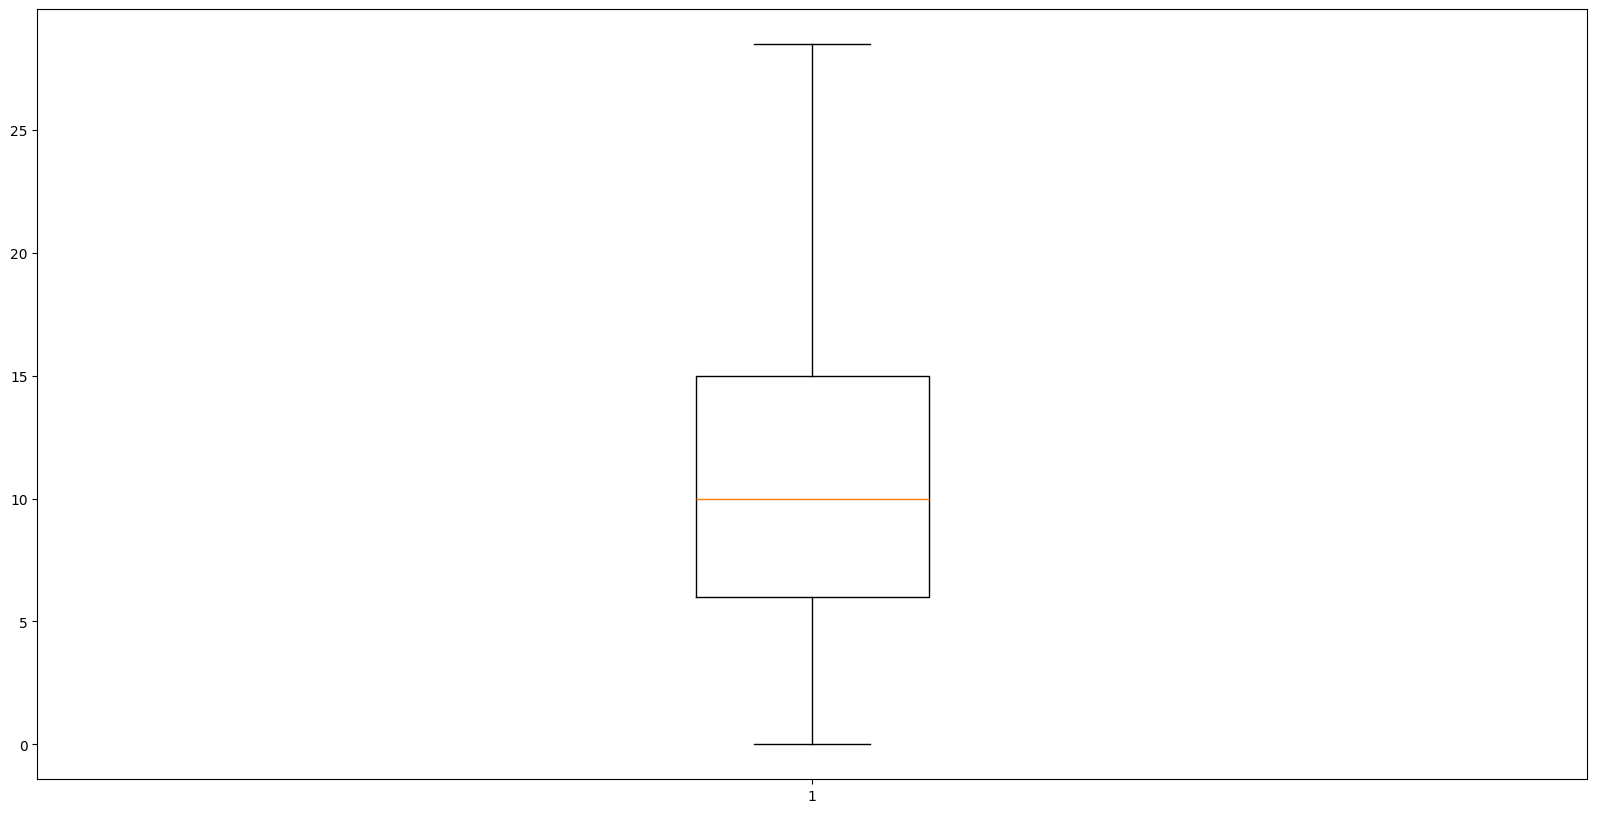

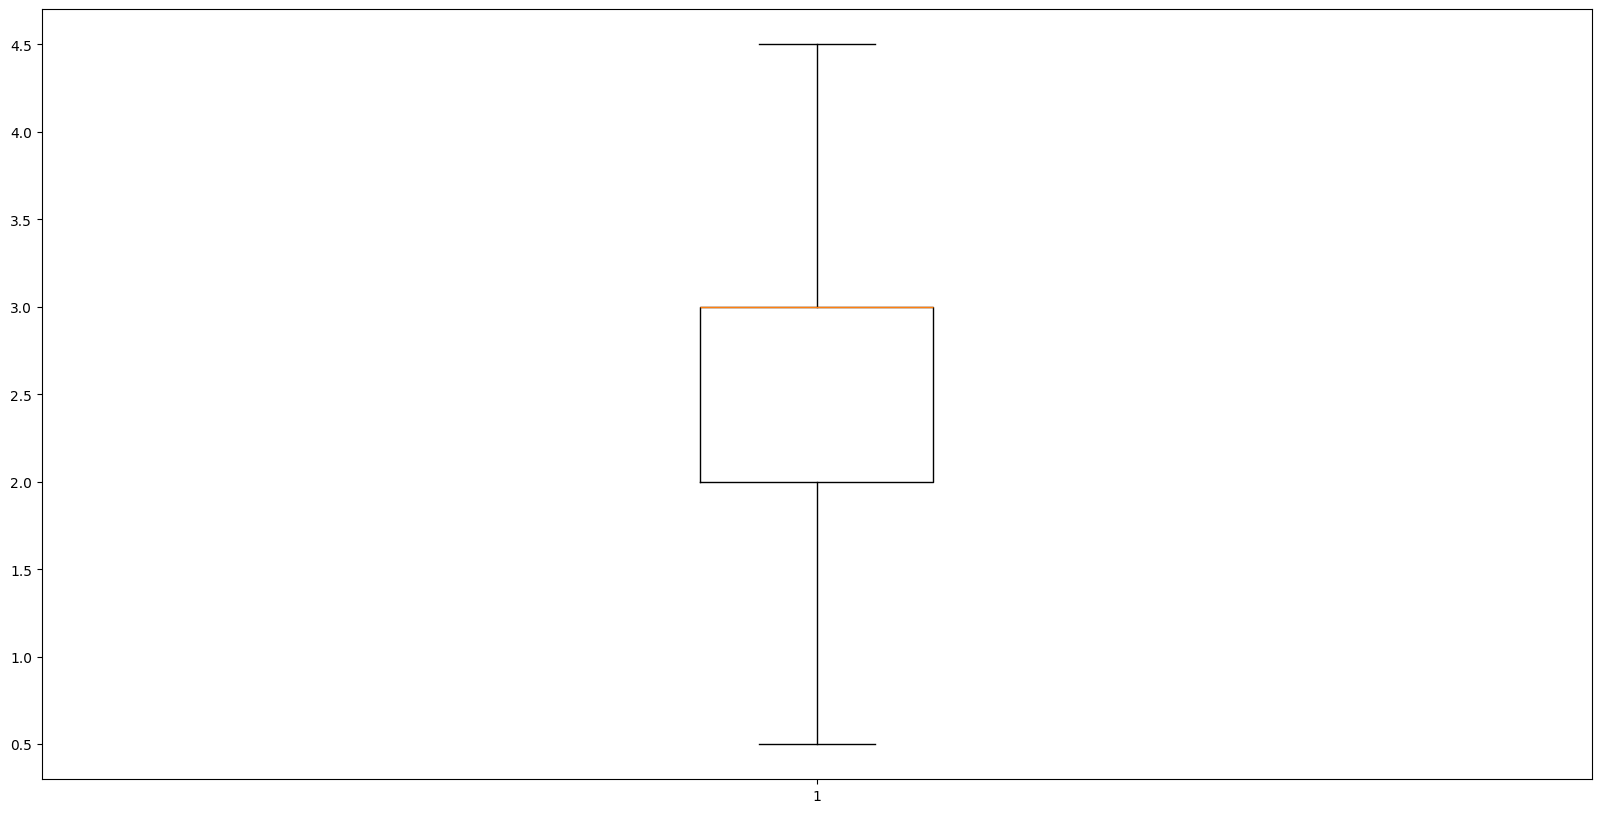

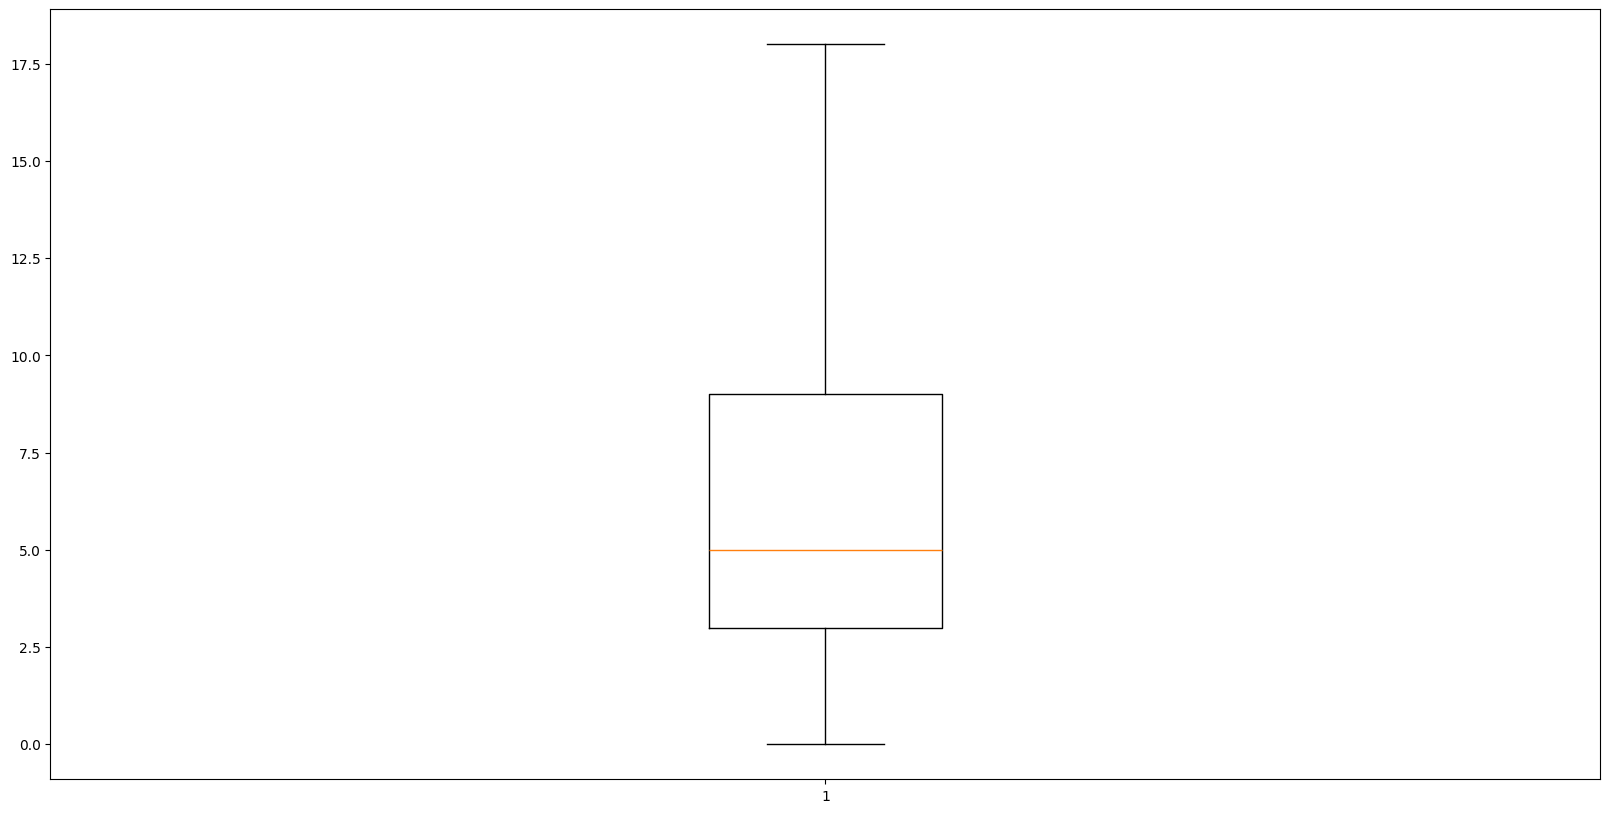

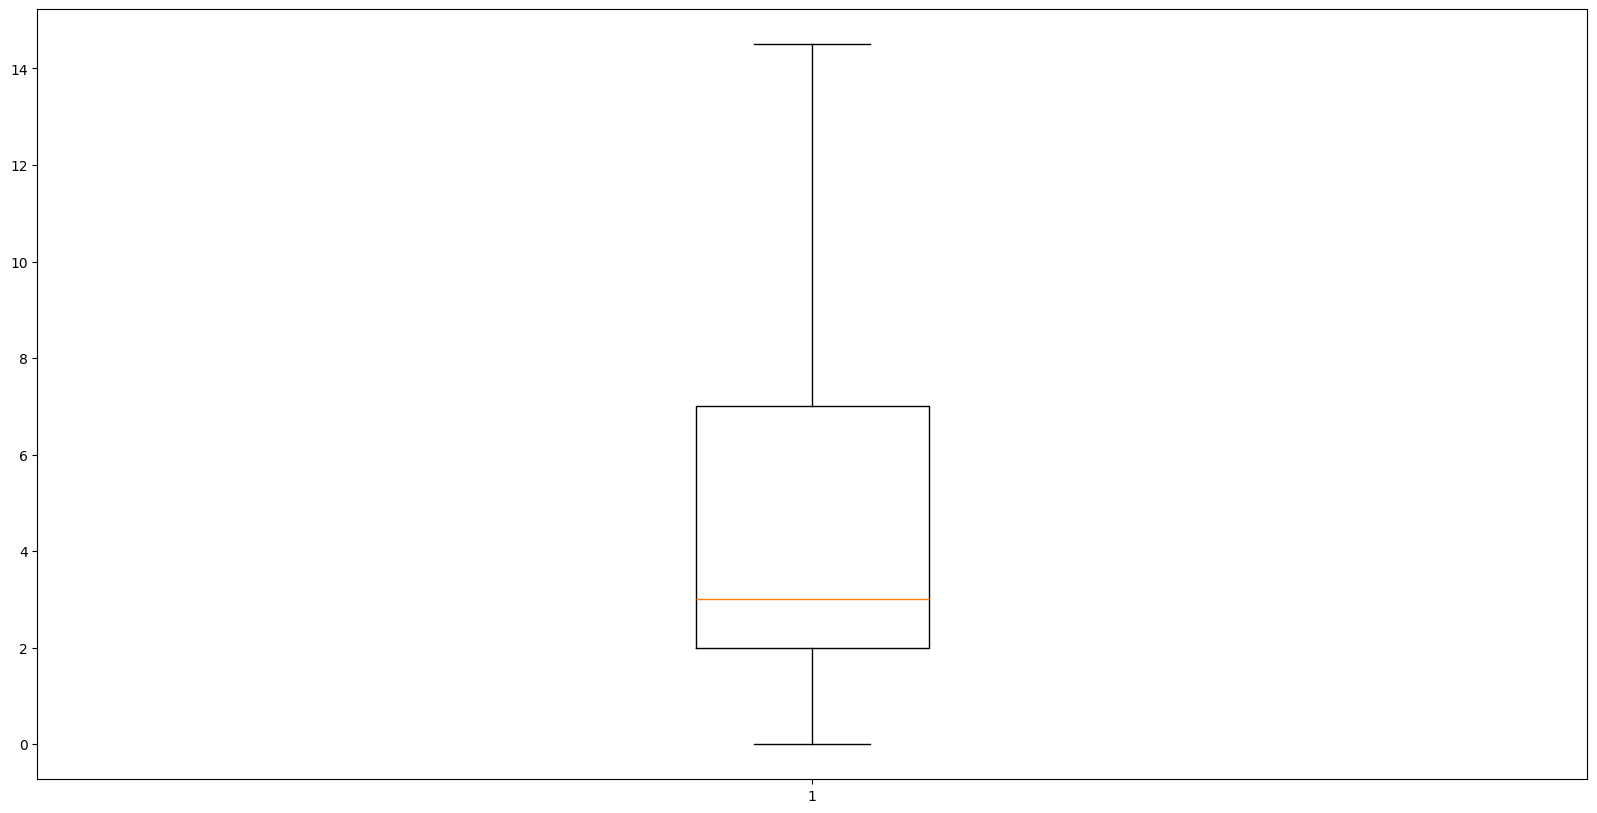

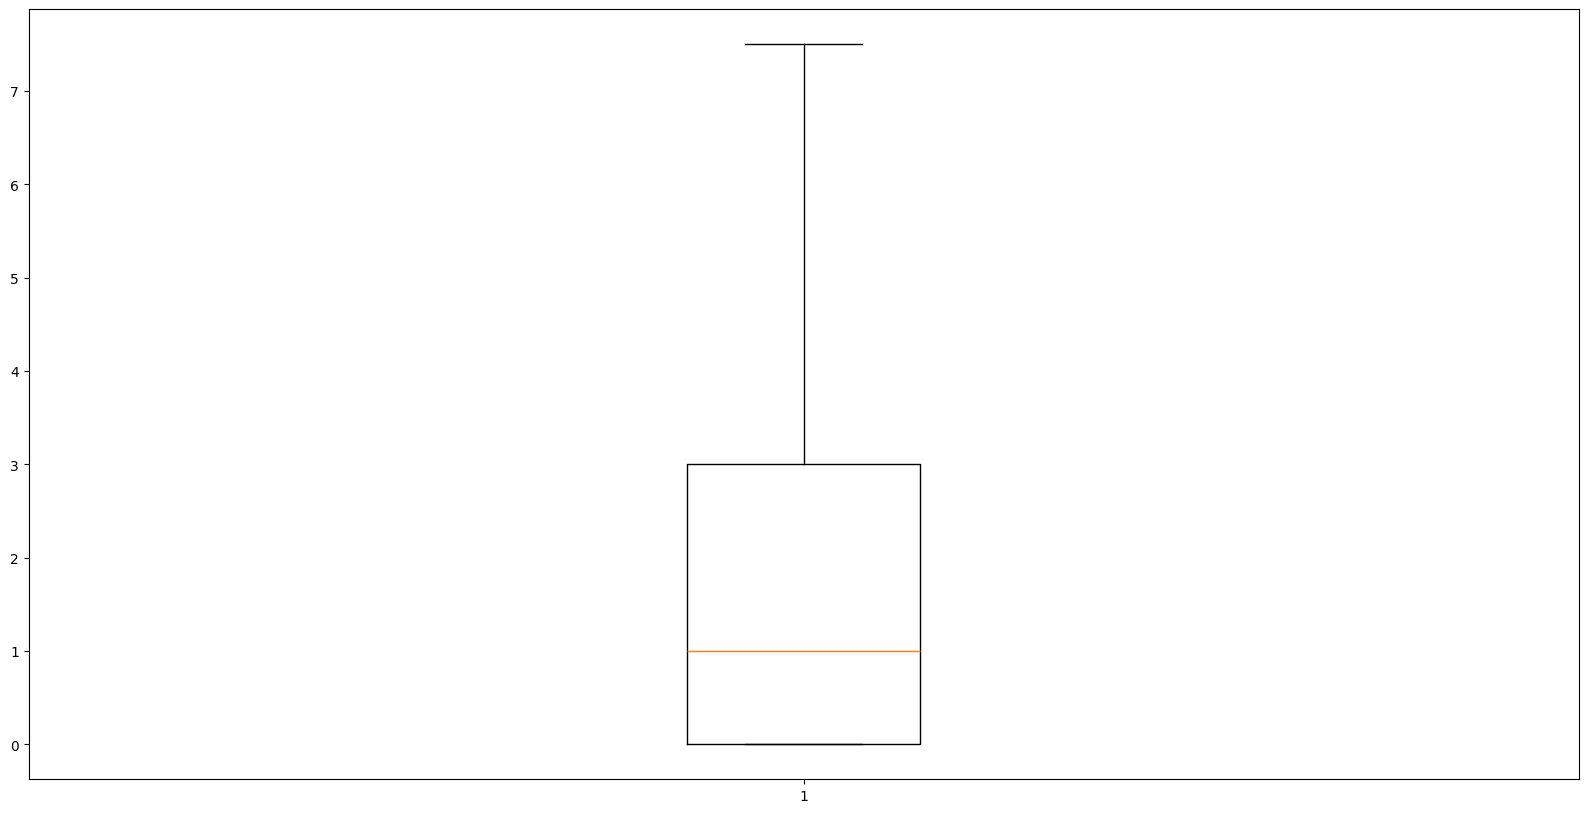

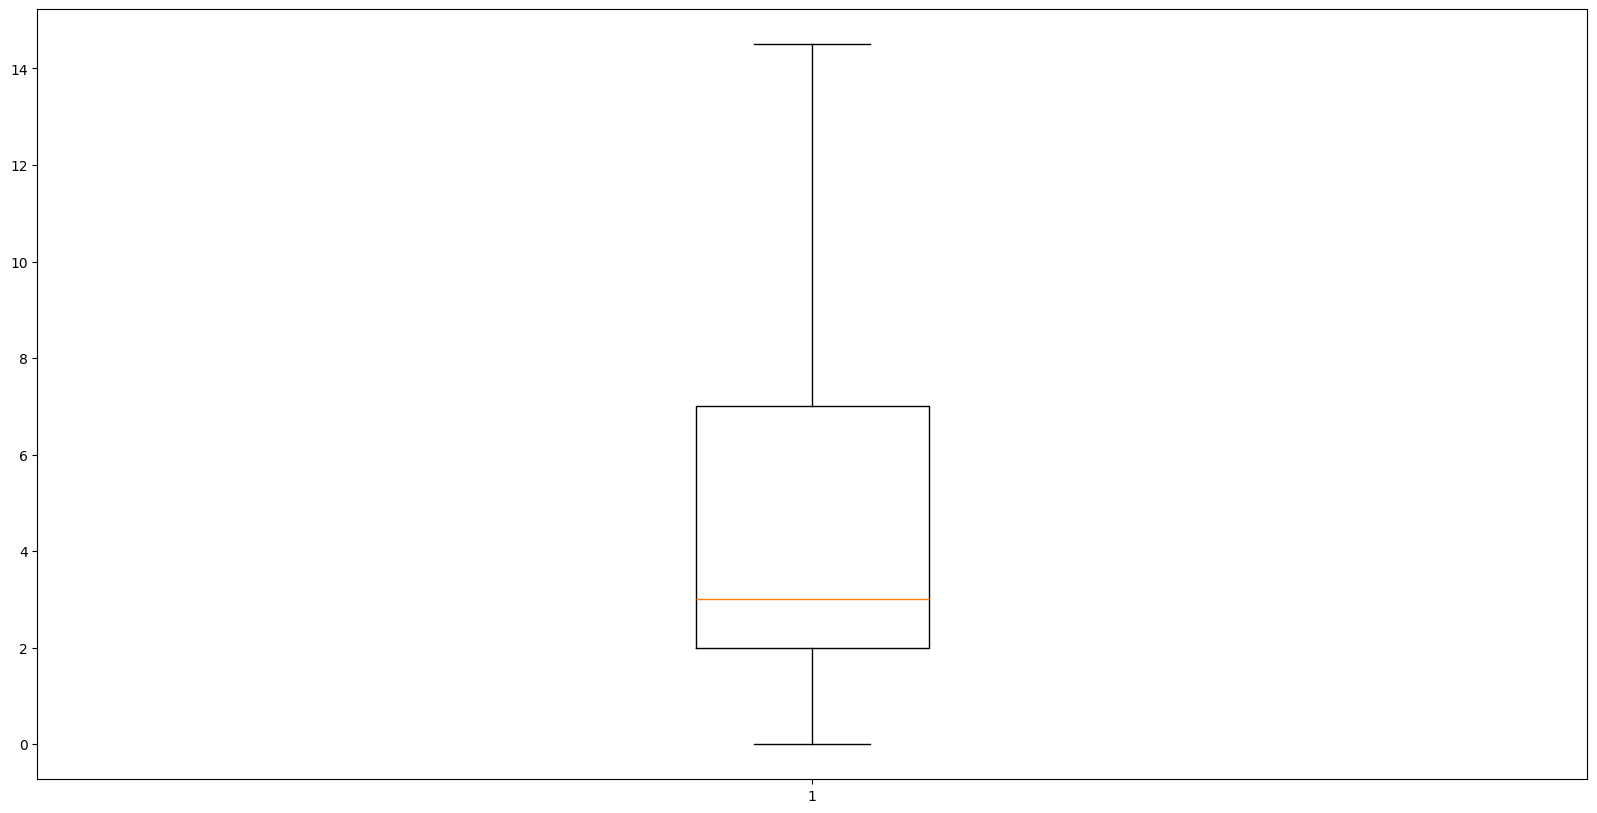

In [143]:
outlier_feature =['MonthlyIncome','NumCompaniesWorked','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']
for col in outlier_feature:
    remove_outliers(col)

In [144]:
del category[7]

In [148]:
#Encoding all the categorical fetaure into numerical value
le=LabelEncoder()
for i in category:
    HRdf[i]=le.fit_transform(HRdf[i])

In [153]:
HRdf.drop('OverTime',axis=1,inplace=True)


In [154]:
correlation=HRdf.corr()

In [155]:
HRdf.corr()['Attrition'].sort_values(ascending=False).drop('Attrition')

MaritalStatus               0.162070
DistanceFromHome            0.077924
JobRole                     0.067151
Department                  0.063991
NumCompaniesWorked          0.042899
Gender                      0.029453
EducationField              0.026846
MonthlyRate                 0.015170
PerformanceRating           0.002889
BusinessTravel              0.000074
HourlyRate                 -0.006846
EmployeeNumber             -0.010577
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.037486
RelationshipSatisfaction   -0.045872
TrainingTimesLastYear      -0.051666
DailyRate                  -0.056652
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156498
Age                        -0.159205
YearsInCurrentRole         -0.161484
YearsAtCompany             -0.162211
M

<Axes: >

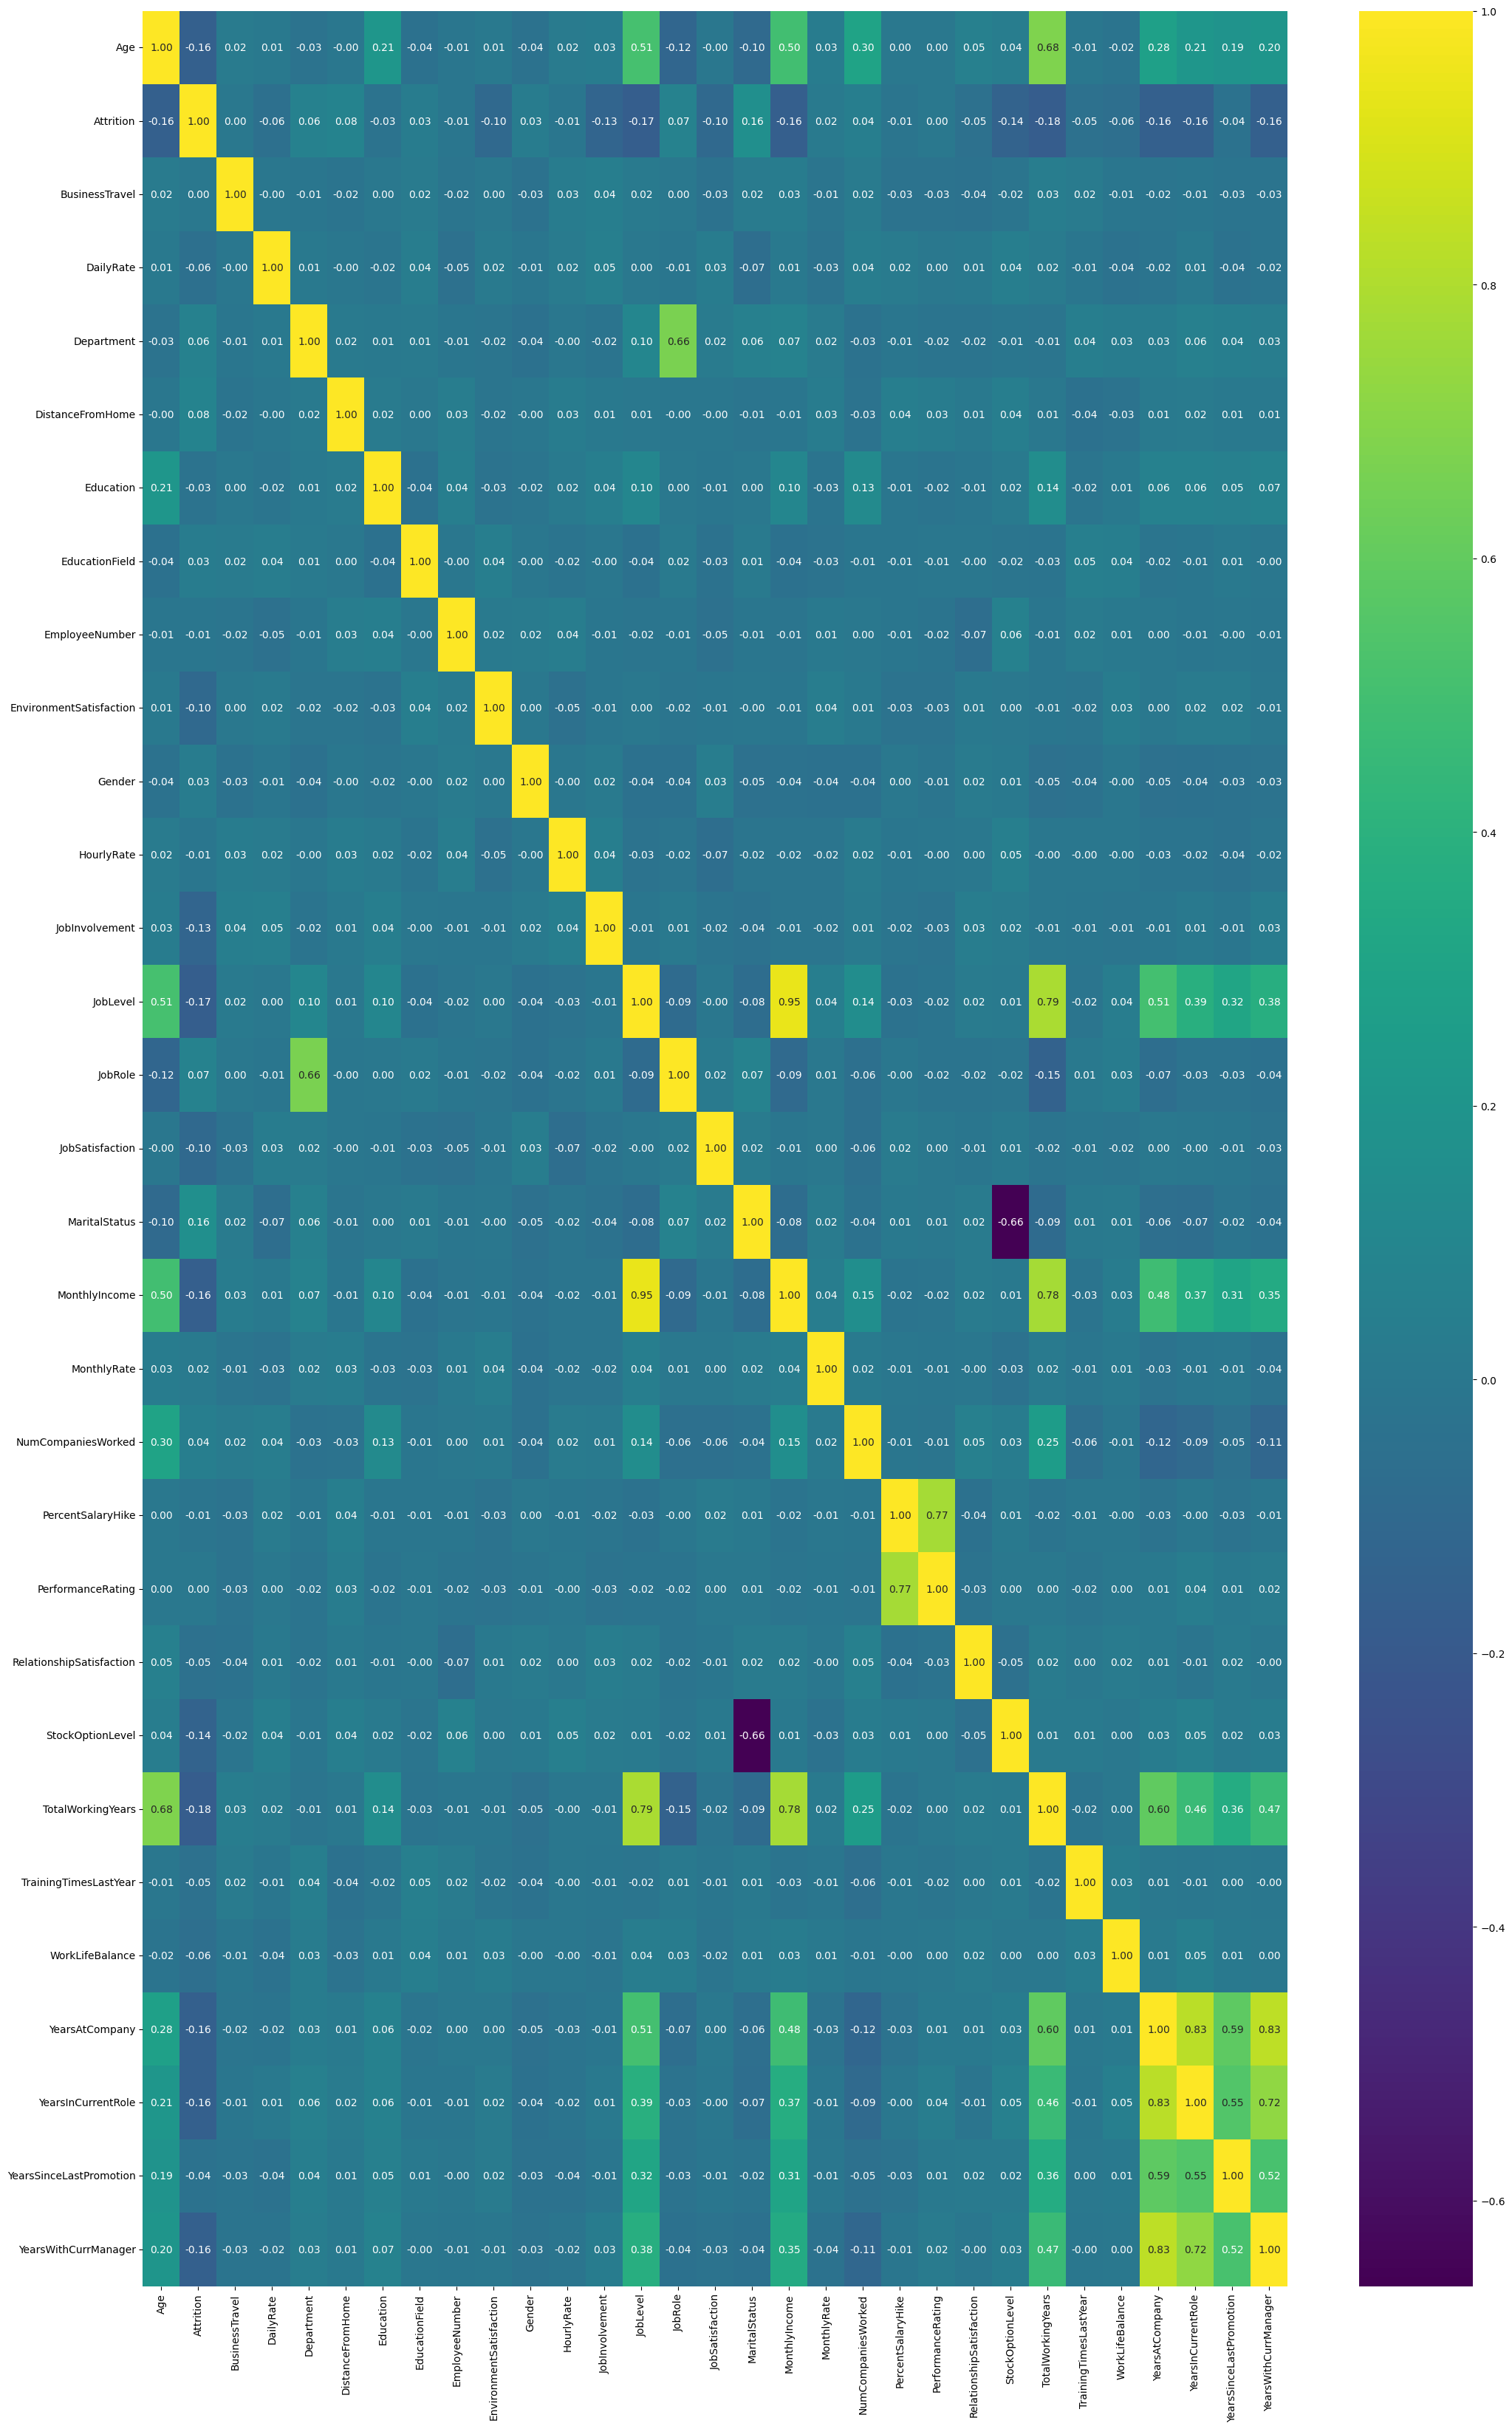

In [156]:
plt.figure(figsize=(25,40))
sns.heatmap(correlation,annot=True,cmap='viridis',fmt='.2f')

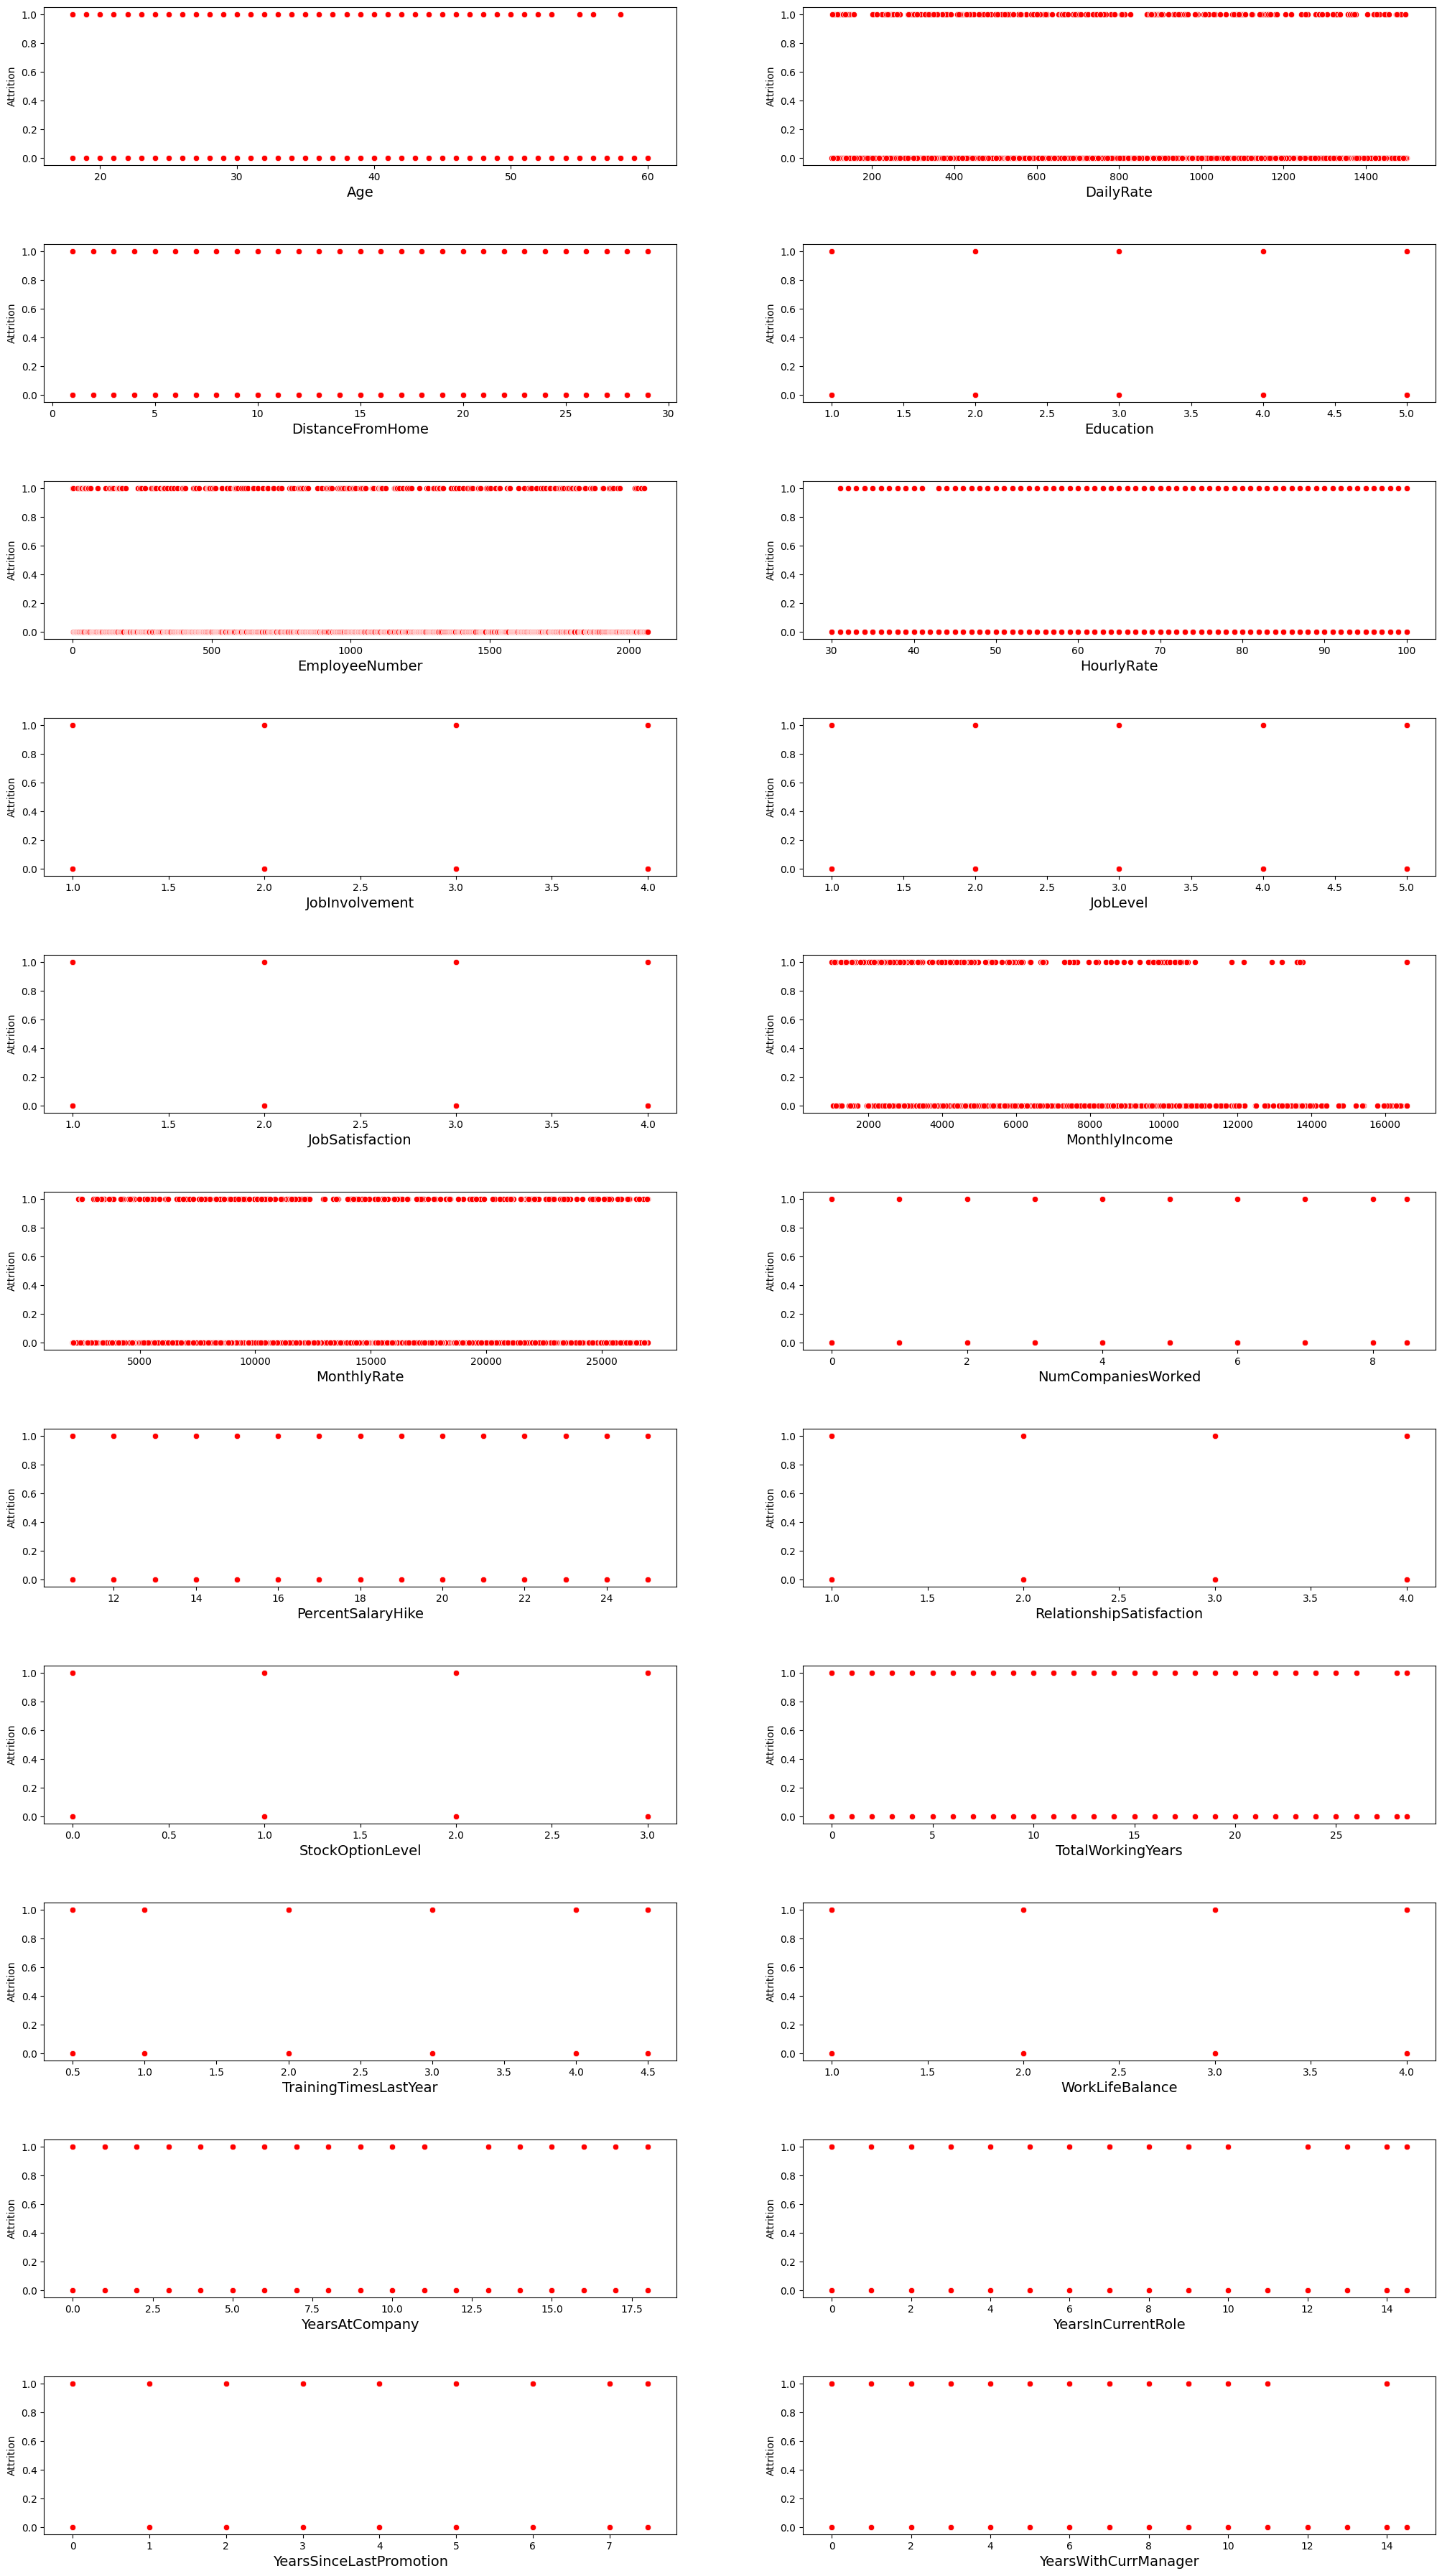

In [157]:
plt.figure(figsize=(25,50),facecolor='white')
count=1
for i in numerical:
    
    
    if count<=27:
        
        
        ax=plt.subplot(12,2,count)
        plt.subplots_adjust(hspace=0.5)
        sns.scatterplot(x=HRdf[i],y=HRdf['Attrition'],color='red')
        plt.xlabel(i,fontsize=14)
        count=count+1
plt.show()

<Axes: xlabel='Attrition', ylabel='OverTime'>

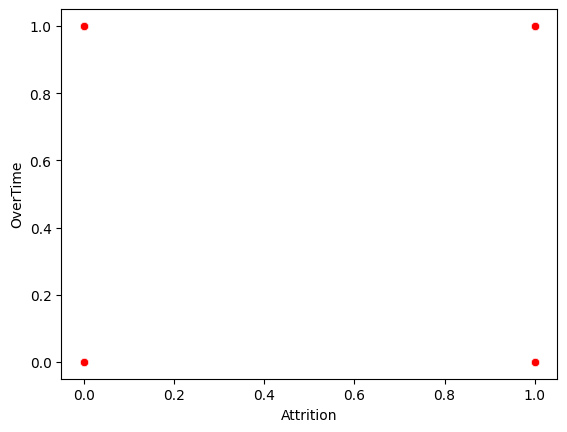

In [62]:
  sns.scatterplot(x=HRdf['Attrition'],y=HRdf['OverTime'],color='red')

<Axes: xlabel='Age', ylabel='TotalWorkingYears'>

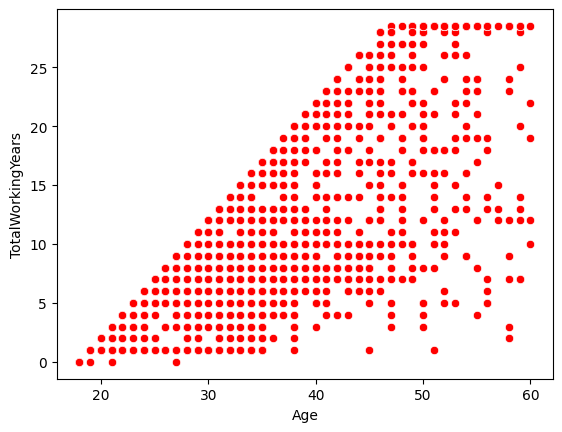

In [158]:
  sns.scatterplot(x=HRdf['Age'],y=HRdf['TotalWorkingYears'],color='red')

<Axes: xlabel='Age', ylabel='MonthlyIncome'>

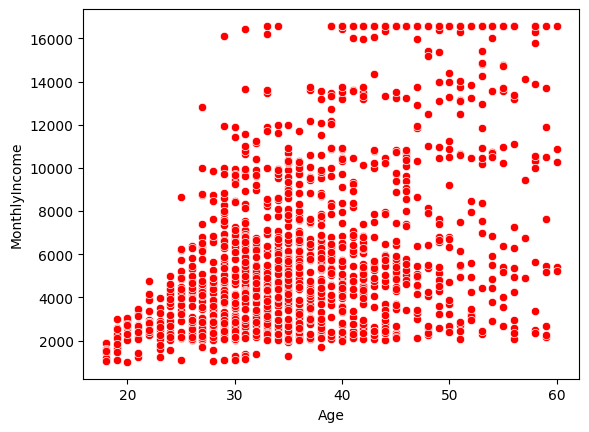

In [159]:
sns.scatterplot(x=HRdf['Age'],y=HRdf['MonthlyIncome'],color='red')

<Axes: xlabel='JobLevel', ylabel='Age'>

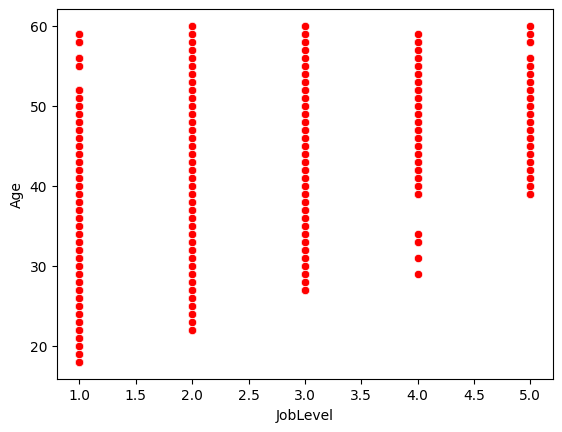

In [160]:
sns.scatterplot(y=HRdf['Age'],x=HRdf['JobLevel'],color='red')

<Axes: xlabel='YearsInCurrentRole', ylabel='YearsAtCompany'>

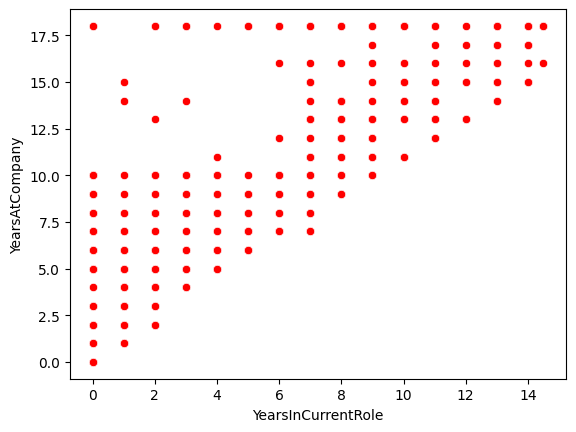

In [161]:
sns.scatterplot(x=HRdf['YearsInCurrentRole'],y=HRdf['YearsAtCompany'],color='red')

In [ ]:
# We already confirmed about the feature correlation in correllation matrix so to just confirm I am plotted scatterplot to check correation

In [162]:
HRdf.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.168595
MonthlyRate                 0.018578
NumCompaniesWorked          0.971516
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           0.855518
TrainingTimesLastYear       0.117931
WorkLifeBalance            -0.552480
Y

In [163]:
for i in numerical:
    print(i,':',round(HRdf[i].skew(),2))

Age : 0.41
DailyRate : -0.0
DistanceFromHome : 0.96
Education : -0.29
EmployeeNumber : 0.02
HourlyRate : -0.03
JobInvolvement : -0.5
JobLevel : 1.03
JobSatisfaction : -0.33
MonthlyIncome : 1.17
MonthlyRate : 0.02
NumCompaniesWorked : 0.97
PercentSalaryHike : 0.82
RelationshipSatisfaction : -0.3
StockOptionLevel : 0.97
TotalWorkingYears : 0.86
TrainingTimesLastYear : 0.12
WorkLifeBalance : -0.55
YearsAtCompany : 0.9
YearsInCurrentRole : 0.8
YearsSinceLastPromotion : 1.26
YearsWithCurrManager : 0.74


In [71]:
feature=['DistanceFromHome','MonthlyIncome','NumCompaniesWorked','PercentSalaryHike','StockOptionLevel','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']
for col in feature:
    HRdf[col]=HRdf[col].apply(np.log1p)

In [164]:
for i in feature:
    print(i,':',round(HRdf[i].skew(),2))

DistanceFromHome : 0.96
MonthlyIncome : 1.17
NumCompaniesWorked : 0.97
PercentSalaryHike : 0.82
PerformanceRating : 1.92
StockOptionLevel : 0.97
TotalWorkingYears : 0.86
YearsAtCompany : 0.9
YearsInCurrentRole : 0.8
YearsSinceLastPromotion : 1.26
YearsWithCurrManager : 0.74


In [165]:
# we observe that for few feature skewness has not been removed so leave it as it is.
#DistanceFromHome is uselessfeature  and highly skewed so we should drop it 
HRdf.drop('DistanceFromHome',axis=1,inplace=True)

In [166]:
x=HRdf.drop('Attrition',axis=1)

In [167]:
x

,Age,BusinessTravel,DailyRate,Department,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,2,1,1,2,0,94,...,3,1,0,8.0,0.5,1,6,4.0,0.0,5.0
1,49,1,279,1,1,1,2,3,1,61,...,4,4,1,10.0,3.0,3,10,7.0,1.0,7.0
2,37,2,1373,1,2,4,4,4,1,92,...,3,2,0,7.0,3.0,3,0,0.0,0.0,0.0
3,33,1,1392,1,4,1,5,4,0,56,...,3,3,0,8.0,3.0,3,8,7.0,3.0,0.0
4,27,2,591,1,1,3,7,1,1,40,...,3,4,1,6.0,3.0,3,2,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,884,1,2,3,2061,3,1,41,...,3,3,1,17.0,3.0,3,5,2.0,0.0,3.0
1466,39,2,613,1,1,3,2062,4,1,42,...,3,1,1,9.0,4.5,3,7,7.0,1.0,7.0
1467,27,2,155,1,3,1,2064,2,1,87,...,4,2,1,6.0,0.5,3,6,2.0,0.0,3.0
1468,49,1,1023,2,3,3,2065,4,1,63,...,3,4,0,17.0,3.0,2,9,6.0,0.0,8.0


In [168]:
y=HRdf.loc[:,'Attrition']

In [169]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [170]:
x.shape

(1470, 29)

In [171]:
y.shape

(1470,)

In [172]:
from sklearn.preprocessing import MinMaxScaler
scaled=MinMaxScaler()
x=pd.DataFrame(scaled.fit_transform(x),columns =x.columns)

In [173]:
x

,Age,BusinessTravel,DailyRate,Department,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.547619,1.0,0.715820,1.0,0.25,0.2,0.000000,0.333333,0.0,0.914286,...,0.0,0.000000,0.000000,0.280702,0.000,0.000000,0.333333,0.275862,0.000000,0.344828
1,0.738095,0.5,0.126700,0.5,0.00,0.2,0.000484,0.666667,1.0,0.442857,...,1.0,1.000000,0.333333,0.350877,0.625,0.666667,0.555556,0.482759,0.133333,0.482759
2,0.452381,1.0,0.909807,0.5,0.25,0.8,0.001451,1.000000,1.0,0.885714,...,0.0,0.333333,0.000000,0.245614,0.625,0.666667,0.000000,0.000000,0.000000,0.000000
3,0.357143,0.5,0.923407,0.5,0.75,0.2,0.001935,1.000000,0.0,0.371429,...,0.0,0.666667,0.000000,0.280702,0.625,0.666667,0.444444,0.482759,0.400000,0.000000
4,0.214286,1.0,0.350036,0.5,0.00,0.6,0.002903,0.000000,1.0,0.142857,...,0.0,1.000000,0.333333,0.210526,0.625,0.666667,0.111111,0.137931,0.266667,0.137931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.428571,0.5,0.559771,0.5,0.25,0.6,0.996613,0.666667,1.0,0.157143,...,0.0,0.666667,0.333333,0.596491,0.625,0.666667,0.277778,0.137931,0.000000,0.206897
1466,0.500000,1.0,0.365784,0.5,0.00,0.6,0.997097,1.000000,1.0,0.171429,...,0.0,0.000000,0.333333,0.315789,1.000,0.666667,0.388889,0.482759,0.133333,0.482759
1467,0.214286,1.0,0.037938,0.5,0.50,0.2,0.998065,0.333333,1.0,0.814286,...,1.0,0.333333,0.333333,0.210526,0.000,0.666667,0.333333,0.137931,0.000000,0.206897
1468,0.738095,0.5,0.659270,1.0,0.50,0.6,0.998549,1.000000,1.0,0.471429,...,0.0,1.000000,0.000000,0.596491,0.625,0.333333,0.500000,0.413793,0.000000,0.551724


In [174]:
x

,Age,BusinessTravel,DailyRate,Department,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.547619,1.0,0.715820,1.0,0.25,0.2,0.000000,0.333333,0.0,0.914286,...,0.0,0.000000,0.000000,0.280702,0.000,0.000000,0.333333,0.275862,0.000000,0.344828
1,0.738095,0.5,0.126700,0.5,0.00,0.2,0.000484,0.666667,1.0,0.442857,...,1.0,1.000000,0.333333,0.350877,0.625,0.666667,0.555556,0.482759,0.133333,0.482759
2,0.452381,1.0,0.909807,0.5,0.25,0.8,0.001451,1.000000,1.0,0.885714,...,0.0,0.333333,0.000000,0.245614,0.625,0.666667,0.000000,0.000000,0.000000,0.000000
3,0.357143,0.5,0.923407,0.5,0.75,0.2,0.001935,1.000000,0.0,0.371429,...,0.0,0.666667,0.000000,0.280702,0.625,0.666667,0.444444,0.482759,0.400000,0.000000
4,0.214286,1.0,0.350036,0.5,0.00,0.6,0.002903,0.000000,1.0,0.142857,...,0.0,1.000000,0.333333,0.210526,0.625,0.666667,0.111111,0.137931,0.266667,0.137931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.428571,0.5,0.559771,0.5,0.25,0.6,0.996613,0.666667,1.0,0.157143,...,0.0,0.666667,0.333333,0.596491,0.625,0.666667,0.277778,0.137931,0.000000,0.206897
1466,0.500000,1.0,0.365784,0.5,0.00,0.6,0.997097,1.000000,1.0,0.171429,...,0.0,0.000000,0.333333,0.315789,1.000,0.666667,0.388889,0.482759,0.133333,0.482759
1467,0.214286,1.0,0.037938,0.5,0.50,0.2,0.998065,0.333333,1.0,0.814286,...,1.0,0.333333,0.333333,0.210526,0.000,0.666667,0.333333,0.137931,0.000000,0.206897
1468,0.738095,0.5,0.659270,1.0,0.50,0.6,0.998549,1.000000,1.0,0.471429,...,0.0,1.000000,0.000000,0.596491,0.625,0.333333,0.500000,0.413793,0.000000,0.551724


from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x)


In [175]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [176]:
vif=pd.DataFrame()
vif['values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features']=x.columns

In [177]:
vif

,values,features
0,10.649612,Age
1,6.390272,BusinessTravel
2,3.941470,DailyRate
3,12.468678,Department
4,4.665708,Education
5,3.785278,EducationField
6,3.844271,EmployeeNumber
7,3.414305,EnvironmentSatisfaction
8,2.446137,Gender
9,4.054589,HourlyRate


In [178]:
x.drop('TotalWorkingYears',axis=1,inplace=True)

In [179]:
vif=pd.DataFrame()
vif['values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features']=x.columns
vif

,values,features
0,7.963756,Age
1,6.382207,BusinessTravel
2,3.932843,DailyRate
3,12.408588,Department
4,4.665664,Education
5,3.781433,EducationField
6,3.844247,EmployeeNumber
7,3.410945,EnvironmentSatisfaction
8,2.445973,Gender
9,4.054140,HourlyRate


In [ ]:
#Here we observed that still multicollinearity exist in the feature so this time i should drop YearsAtCompany Feature

In [155]:
x.drop('YearsAtCompany',axis=1,inplace=True)

In [156]:
vif=pd.DataFrame()
vif['values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features']=x.columns
vif

,values,features
0,8.126295,Age
1,6.453111,BusinessTravel
2,3.957765,DailyRate
3,12.645813,Department
4,3.252529,DistanceFromHome
5,4.692705,Education
6,3.806133,EducationField
7,3.869572,EmployeeNumber
8,3.449097,EnvironmentSatisfaction
9,2.455028,Gender


In [85]:
y.value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

In [ ]:
# Here we observed that target feature  is imbalanced (each category should be same count) so we need first balance it 

In [180]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
X_pca=pca.fit_transform(x)

In [90]:
from imblearn.over_sampling import SMOTE

In [181]:
smt=SMOTE()
x1,y1=smt.fit_resample(X_pca,y)


In [183]:
y1.value_counts()

Attrition
1    1233
0    1233
Name: count, dtype: int64

In [182]:
x1

array([[-0.06606638,  0.7568218 ],
       [ 0.07485812, -0.38866906],
       [-0.82305817, -0.16584983],
       ...,
       [-0.08383437, -0.25230294],
       [-0.56309633, -0.24249224],
       [-0.5652615 , -0.16986109]])

In [95]:
y1

0       1
1       0
2       1
3       0
4       0
       ..
2461    1
2462    1
2463    1
2464    1
2465    1
Name: Attrition, Length: 2466, dtype: int64

In [209]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve,auc,roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [185]:
maxac=0
maxRs=0
for i in range(1,200):
    
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=i)
    RFC=RandomForestClassifier()
    RFC.fit(x_train,y_train)
    pred=RFC.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxac:
        maxac=acc
        maxRS=i
print('best accuracy',maxac,"at random state",maxRS)


best accuracy 0.7932432432432432 at random state 24


In [186]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=maxRS)
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
pred=RFC.predict(x_test)
acc=accuracy_score(y_test,pred)
print('Accuracy is',acc)

Accuracy is 0.7959459459459459


In [187]:
def classification_models(model,x_train,y_train,x_test,y_test):
     
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    print(accuracy_score(y_test,pred))
    c_matrix=confusion_matrix(y_test,pred)
    print(c_matrix)
    print(classification_report(y_test,pred))
    x_labels=['0','1']
    y_labels=['0','1']
    plt.figure(figsize=(6,6))
    sns.heatmap(c_matrix,annot=True,linewidth=0.2,linecolor='red',fmt='.2f')
    plt.xlabel('predicted value')
    plt.ylabel('actual value')
    
    plt.figure(figsize=(10,6))
    plt.scatter(y_test, pred, alpha=0.5, color='b', label='Predicted vs. Actual')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Scatter Plot: Actual vs. Predicted')
    plt.legend()
    plt.show()
   

0.7716216216216216
[[270  88]
 [ 81 301]]
              precision    recall  f1-score   support

           0       0.77      0.75      0.76       358
           1       0.77      0.79      0.78       382

    accuracy                           0.77       740
   macro avg       0.77      0.77      0.77       740
weighted avg       0.77      0.77      0.77       740



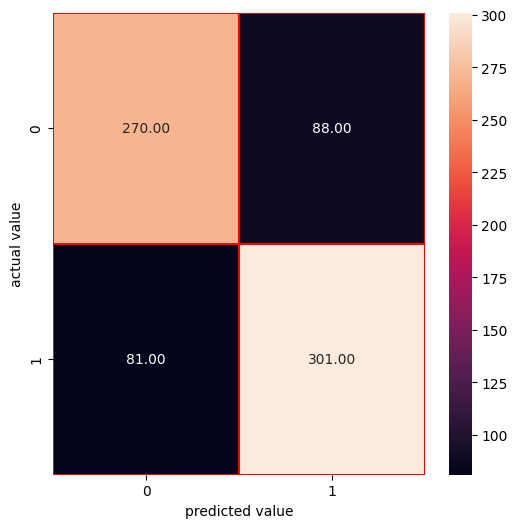

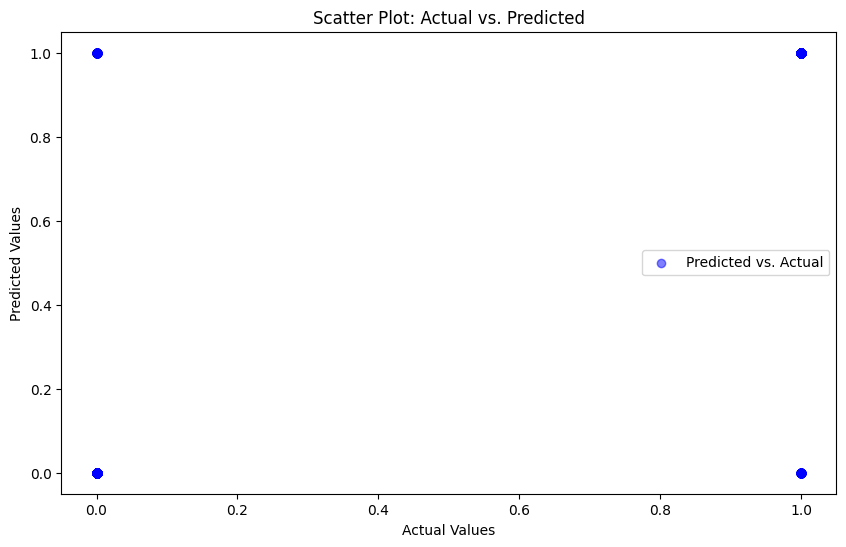

In [214]:
xgbc = XGBClassifier()

classification_models(xgbc,x_train,y_train,x_test,y_test)

0.6189189189189189
[[186 172]
 [110 272]]
              precision    recall  f1-score   support

           0       0.63      0.52      0.57       358
           1       0.61      0.71      0.66       382

    accuracy                           0.62       740
   macro avg       0.62      0.62      0.61       740
weighted avg       0.62      0.62      0.62       740



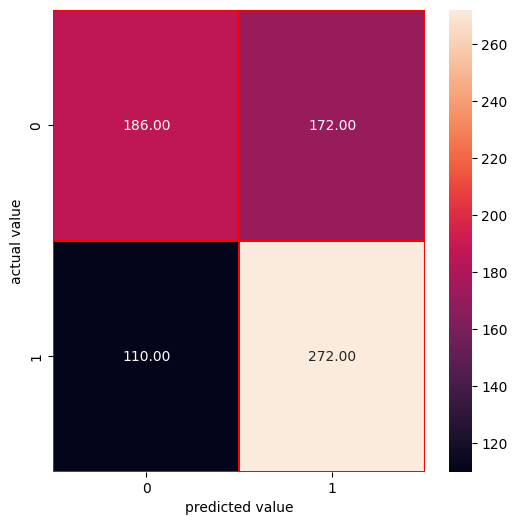

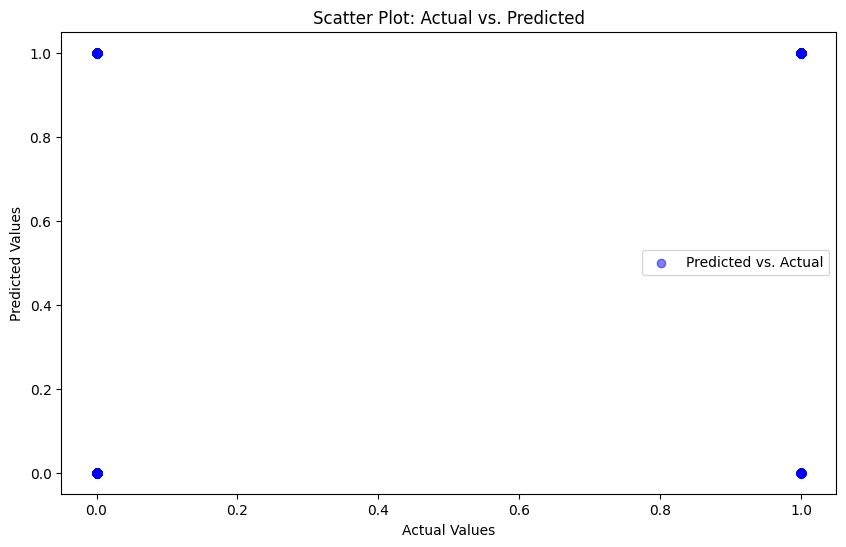

In [188]:
LR=LogisticRegression()
classification_models(LR,x_train,y_train,x_test,y_test)

0.7783783783783784
[[276  82]
 [ 82 300]]
              precision    recall  f1-score   support

           0       0.77      0.77      0.77       358
           1       0.79      0.79      0.79       382

    accuracy                           0.78       740
   macro avg       0.78      0.78      0.78       740
weighted avg       0.78      0.78      0.78       740



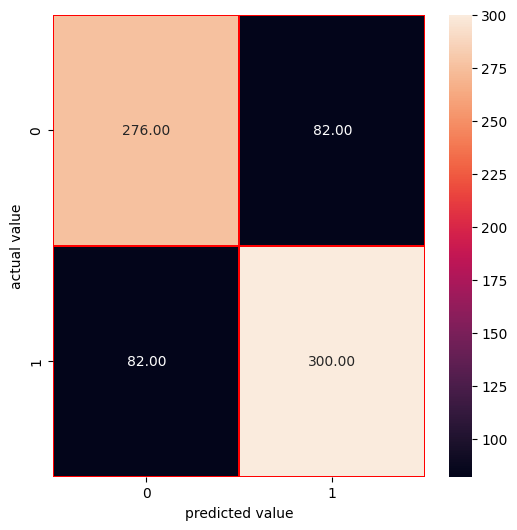

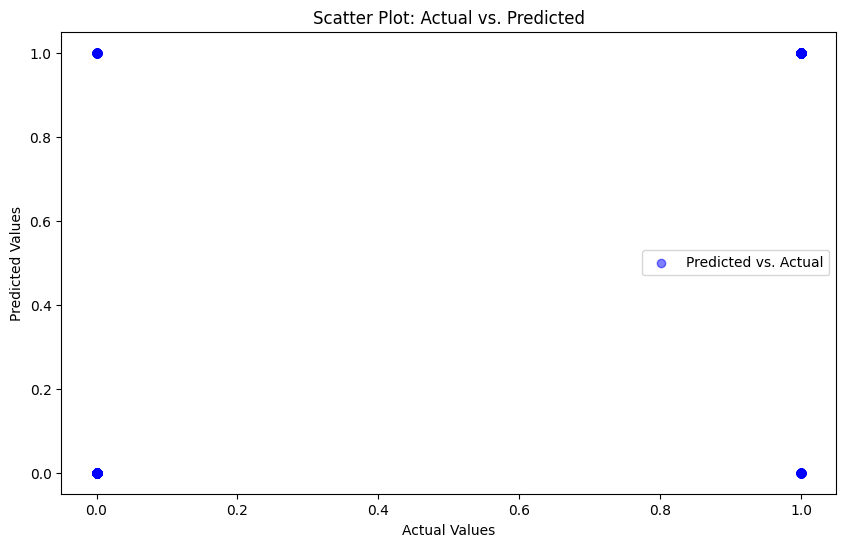

In [189]:
RFC=RandomForestClassifier()
classification_models(RFC,x_train,y_train,x_test ,y_test)

0.65
[[260  98]
 [161 221]]
              precision    recall  f1-score   support

           0       0.62      0.73      0.67       358
           1       0.69      0.58      0.63       382

    accuracy                           0.65       740
   macro avg       0.66      0.65      0.65       740
weighted avg       0.66      0.65      0.65       740



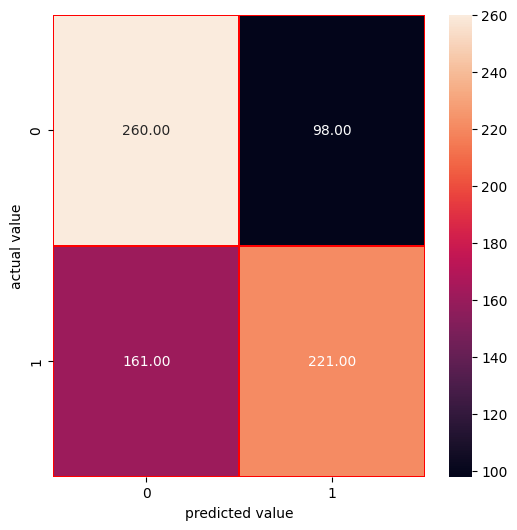

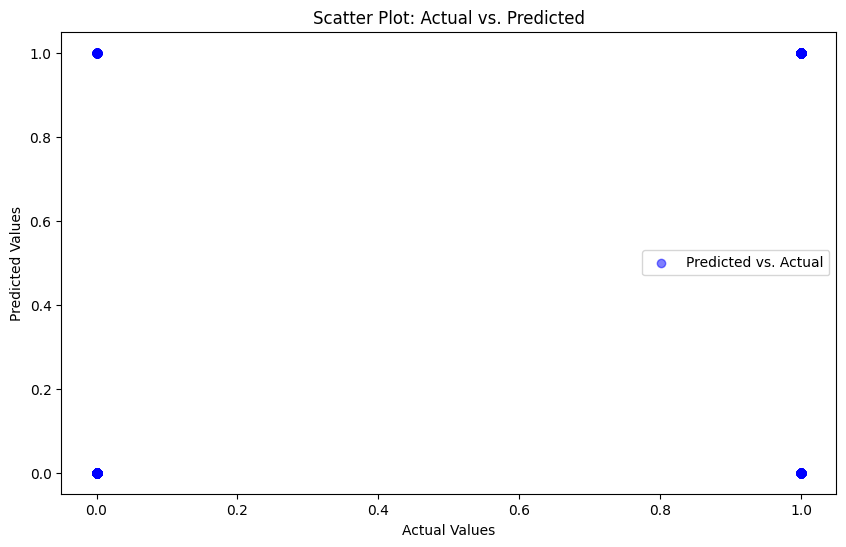

In [195]:
svc=SVC(kernel='rbf')
classification_models(svc,x_train,y_train,x_test ,y_test)

0.7945945945945946
[[278  80]
 [ 72 310]]
              precision    recall  f1-score   support

           0       0.79      0.78      0.79       358
           1       0.79      0.81      0.80       382

    accuracy                           0.79       740
   macro avg       0.79      0.79      0.79       740
weighted avg       0.79      0.79      0.79       740



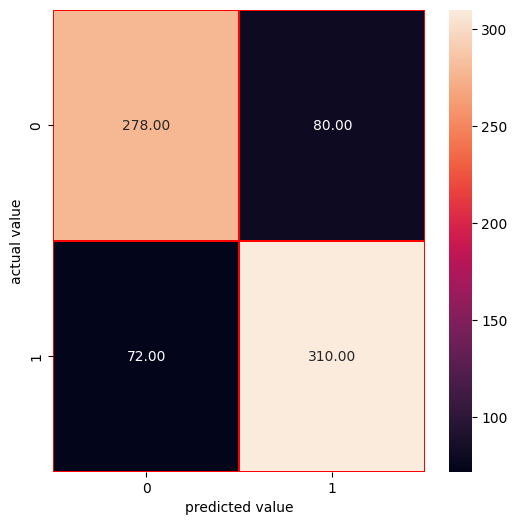

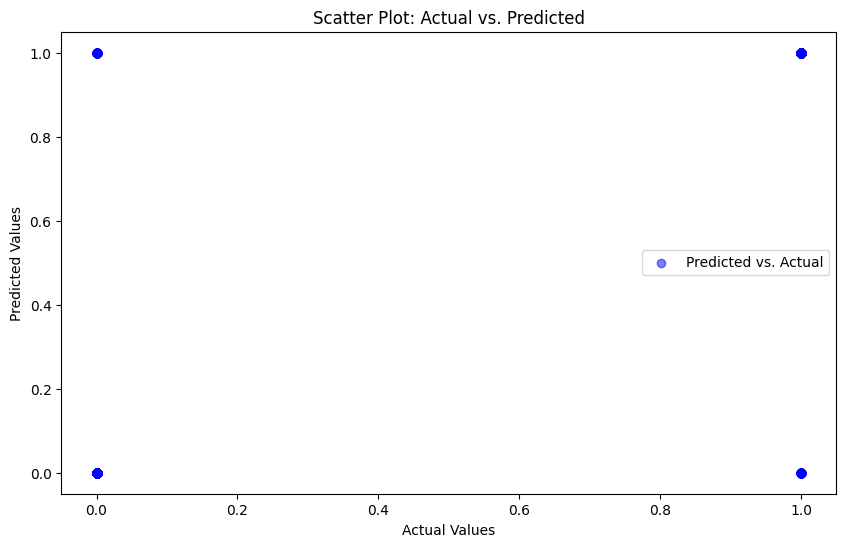

In [196]:
etc=ExtraTreesClassifier()
classification_models(etc,x_train,y_train,x_test,y_test)

0.7013513513513514
[[270  88]
 [133 249]]
              precision    recall  f1-score   support

           0       0.67      0.75      0.71       358
           1       0.74      0.65      0.69       382

    accuracy                           0.70       740
   macro avg       0.70      0.70      0.70       740
weighted avg       0.71      0.70      0.70       740



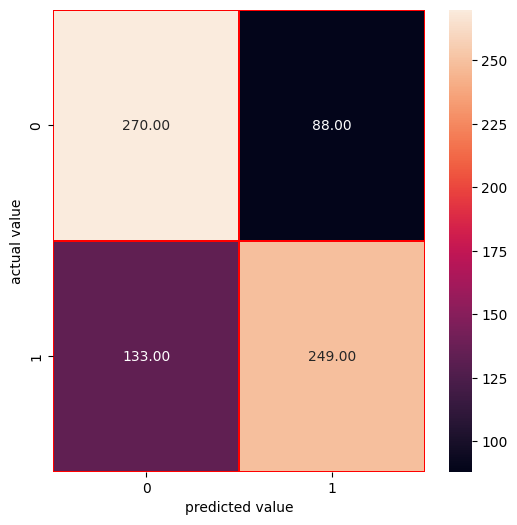

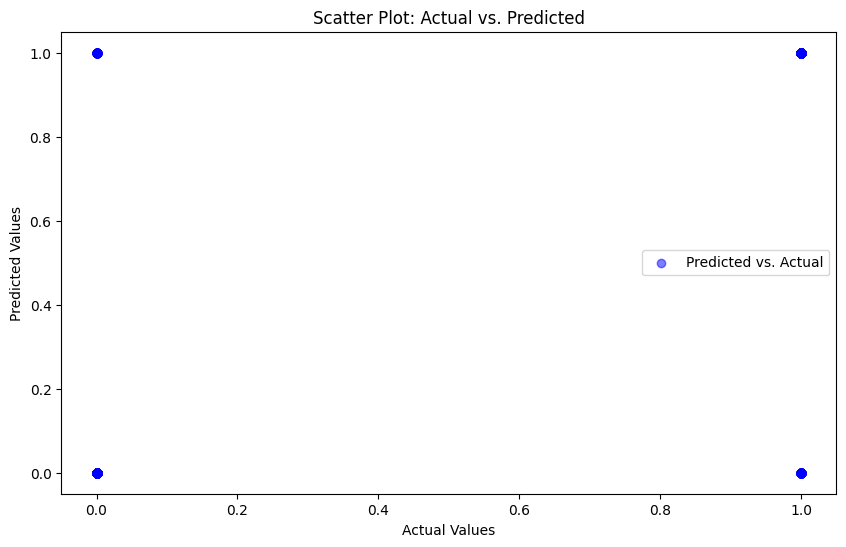

In [197]:
gbc=GradientBoostingClassifier()
classification_models(gbc,x_train,y_train,x_test,y_test)

0.7878378378378378
[[288  70]
 [ 87 295]]
              precision    recall  f1-score   support

           0       0.77      0.80      0.79       358
           1       0.81      0.77      0.79       382

    accuracy                           0.79       740
   macro avg       0.79      0.79      0.79       740
weighted avg       0.79      0.79      0.79       740



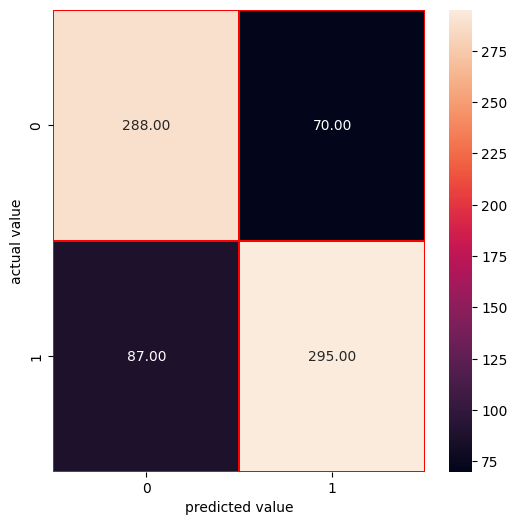

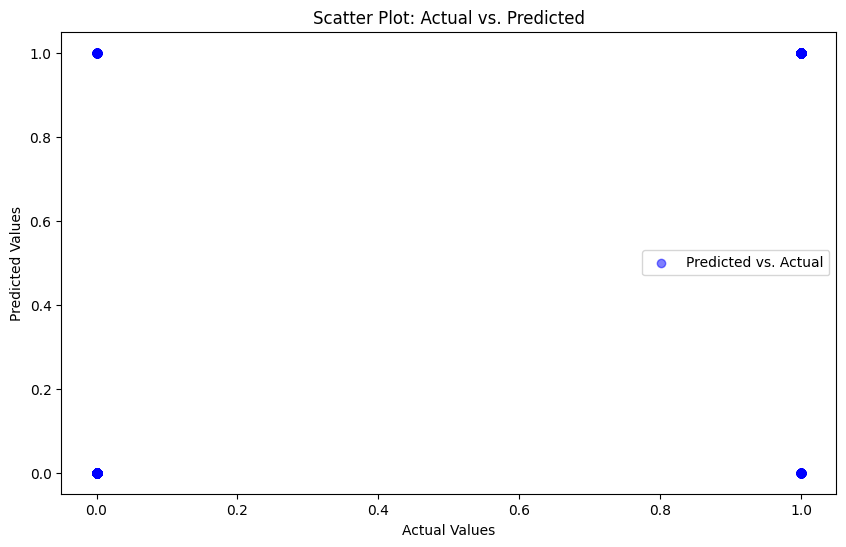

In [198]:
bgc=BaggingClassifier()
classification_models(bgc,x_train,y_train,x_test,y_test)

0.7581081081081081
[[274  84]
 [ 95 287]]
              precision    recall  f1-score   support

           0       0.74      0.77      0.75       358
           1       0.77      0.75      0.76       382

    accuracy                           0.76       740
   macro avg       0.76      0.76      0.76       740
weighted avg       0.76      0.76      0.76       740



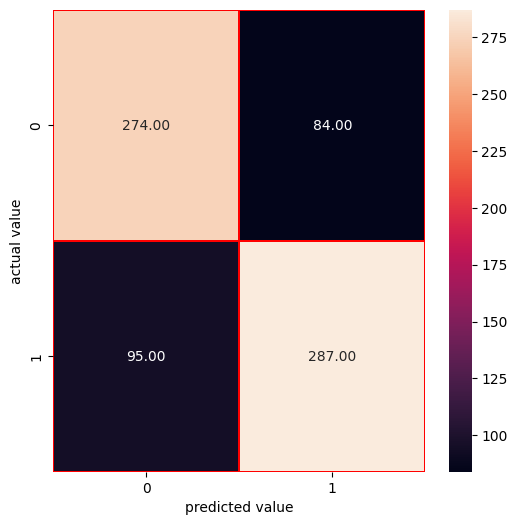

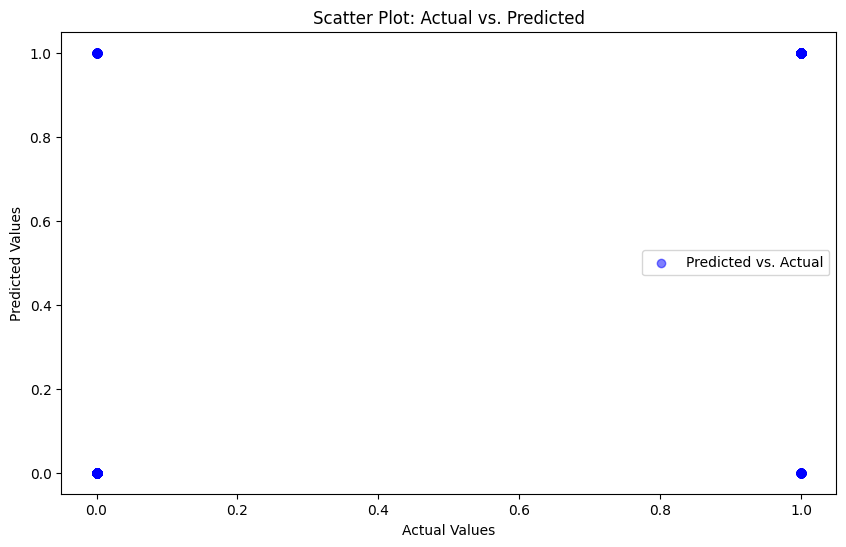

In [199]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()
classification_models(dtc,x_train,y_train,x_test,y_test)

0.7581081081081081
[[272  86]
 [ 93 289]]
              precision    recall  f1-score   support

           0       0.75      0.76      0.75       358
           1       0.77      0.76      0.76       382

    accuracy                           0.76       740
   macro avg       0.76      0.76      0.76       740
weighted avg       0.76      0.76      0.76       740



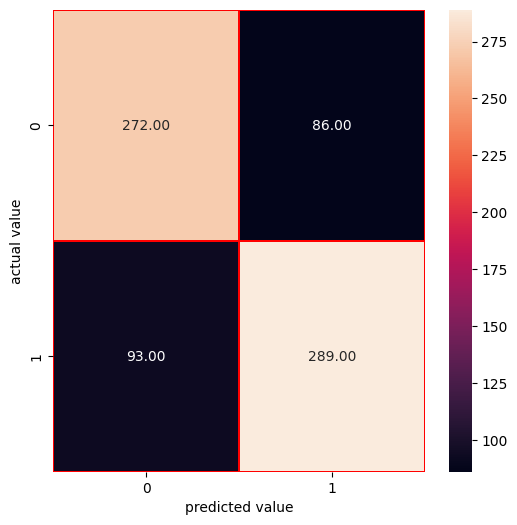

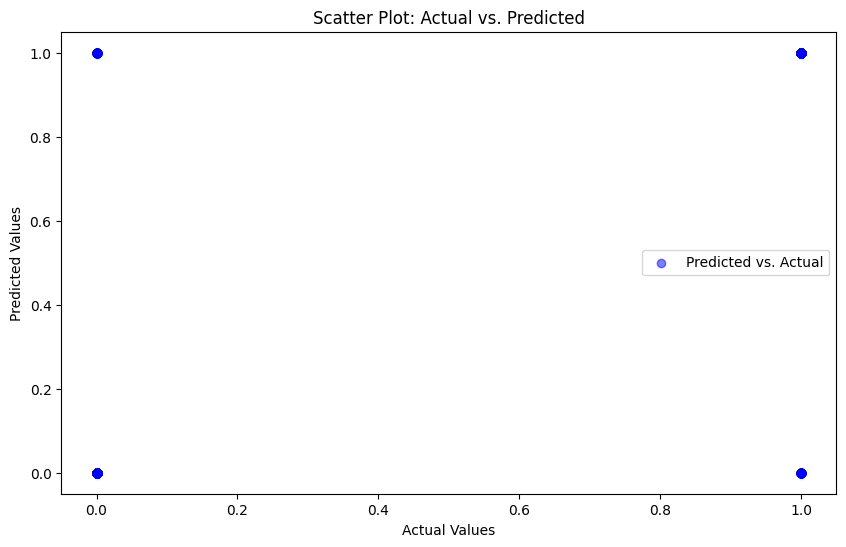

In [200]:
knn=KNeighborsClassifier()
classification_models(dtc,x_train,y_train,x_test,y_test)


In [201]:
def cross_validation(model,x1,y1,x_test):
    
    pred=model.predict(x_test)
    score=cross_val_score(model,x1,y1)
    print(score)
    print(score.mean())
    print('differnce between accuracy score and cross validation is',accuracy_score(y_test,pred)-score.mean())

In [202]:
cross_validation(LR,x1,y1,x_test)

[0.6194332  0.60851927 0.61257606 0.60851927 0.62068966]
0.613947491603091
differnce between accuracy score and cross validation is 0.004971427315827892


In [203]:
# checking cross_validation score for Random Forest Classifer
cross_validation(RFC,x1,y1,x_test)


[0.7854251  0.76673428 0.78701826 0.7505071  0.77281947]
0.7725008417439293
differnce between accuracy score and cross validation is 0.005877536634449121


In [204]:
cross_validation(etc,x1,y1,x_test)

[0.80364372 0.78296146 0.80933063 0.75659229 0.77281947]
0.7850695157303462
differnce between accuracy score and cross validation is 0.00952507886424836


In [215]:
cross_validation(xgbc,x1,y1,x_test)

[0.77327935 0.76876268 0.79716024 0.73833671 0.76470588]
0.76844897389362
differnce between accuracy score and cross validation is 0.003172647728001632


In [205]:
cross_validation(gbc,x1,y1,x_test)

[0.71052632 0.70182556 0.69979716 0.67545639 0.73427992]
0.7043770684317284
differnce between accuracy score and cross validation is -0.0030257170803770217


In [207]:
cross_validation(dtc,x1,y1,x_test)


[0.76315789 0.73427992 0.77079108 0.73833671 0.73427992]
0.748169104302338
differnce between accuracy score and cross validation is 0.009939003805770175


# Here I have selected ExtraTreesClassifier   as my final model  as the difference between accuracy score and cross validation score is very less

[0.78137652 0.78498986 0.80730223 0.76876268 0.78498986]

0.7854842285930148

differnce between accuracy score and cross validation is 0.009110366001579773
​



In [115]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}


In [117]:
model = ExtraTreesClassifier()
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [154]:
grid_search.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [157]:
final_model=ExtraTreesClassifier(max_depth=None,max_features='sqrt',min_samples_leaf=1,min_samples_split=2,n_estimators=200)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
print(accuracy_score(y_test,pred))

0.8027027027027027


In [ ]:
# Now finally performance of my model improved from  earlier performance 

In [ ]:
                PLOTING AUC_ROC CURVE 

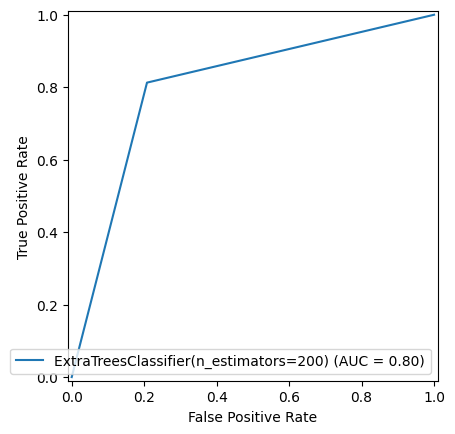

In [158]:
from sklearn import metrics
fpr,tpr,threshold=metrics.roc_curve(y_test,pred)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=final_model)
display.plot()

In [159]:
import joblib
joblib.dump(final_model,'HR_Analytics.pkl')

['HR_Analytics.pkl']

In [160]:
prediction=final_model.predict(x_test)
prediction

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,

In [161]:
prd_test=np.array(y_test)

In [162]:
df=pd.DataFrame()
df['predicted']=prediction
df['orignal']=prd_test
df

,predicted,orignal
0,1,1
1,0,0
2,1,1
3,0,1
4,1,1
...,...,...
735,0,0
736,0,0
737,0,1
738,1,1
